# Heart Disease Prediction with highest accuracy
## DSI7 - Capstone Project 
### By Didem Iscan

## Outline

1. Introduction
2. Data Cleaning
    - Importing 4 different dataset & building a data frame
    - Predicting null values
3. EDA 
    - Data description & plotting
4. Modelling & Predicting
    - Finding the best model & predict heart disease with highest accuracy  
5. Comparing Best Model with dropped missing values vs predicted missing values
    - Defining new data frame (dropped null values)
    - Model the data frame & compare your scores with the best model
6. Conclusion


# 1. Introduction

My dataset is about heart disease classification from the heart scores that I have. I combined 4 different csv files from different places, which are from Cleveland, Switzerland, LongBeach, and Hungary. I have 919 different subjects and 15 different attributes. I found this dataset from dataworld (link: https://data.world/xprizeai-health/heart-disease). During my analysis, I found different models that I can use for my modelling on Kaggle(link: https://www.kaggle.com/danimal/heartdiseaseensembleclassifier).

In the dataset I have 2 different types of variables:
    - Continuous Variables: suject id, age, trestpbs, chol, thalach, oldpeak
    - Categorical Variables: sex, cp, fbs, restecg, exang, slop, ca, thal, pred_attribute, origin

The aim of this project is to find the best way to predict a heart disease, with highest accuracy and lowest false positive prediction rate. To have the best prediction I ran different models and found the best model. 

Summary of the sections:
- Section 2 & 3; I analysed and understood the meaning of each column, cleaned the dataset, and predicted the null values in the data frame. I predicted the missing values by checking the mean, median of those values, and by using GridSearch find the best model to predict null values. 

- Section 4: I ran different models to predict the heart disease and try to find the best accurate prediction. I did different models, and try to increase the accuracy score to have the best prediction. 

- Section 5: Compare the best model with predicted null values vs dropped null values and see if predicting the missing values increase the accuracy of heart disease prediction. 

# 2. Data Cleaning

In this section, first I imported my four different datasets, then cleaned the dataset and checked the value types to have the data correctly. After orginising and building a new data frame called **df**, I predicted the null values by using different modelling with GridSearch. 

- On my dataset there are some '?' variables. How did I fix them?

    1. Changed all the '?' to np.nan 
    2. Turned the columns into floats
    3. Checked each '?' columns and see if I can change them by the mean, mode or median.
        - When it didn't work, I checked each missing value and compared the sex, age, heart rates with other 
          rows which doesn't have any missing values. By the analysis I predicted the rates and gave an approximate 
          value. 
    4. Used GridSearch to find out the best score for each column
        - Built categorical and continuous grid parameters for decision tree, random forest and bagging models
        - For categorical values:
            1. Calculated the baseline to compare it with the accuracy scores
            2. GridSearch to find the best model
            3. Calculated the accuracy score for each model & compared with the baseline 
            4. Chose the highest value & assigned it as the best model
                - Compared the accuracy score of each model with the baseline and picked the highest score as the best model. If the baseline is the highest, I gave the baseline as a predicted value. Else I used the model and predicted the missing values.
        - For continuous values:
            1. Calculated the mean 
            2. GridSearch to find the best model
            3. Calculated the best score for each model & compared with each other
            4. Chose the highest value & assigned it as the best model
                - Compared the best scores of each model. If the scores were higher than 0 I picked the highest score and predicted the missing values. If the best scores were lower than 0, I used random imputation to predict the missing values, where I picked randomly from my y column and assigned them as predicted values. 
                     
During this process, I first started with the column which has the minimum number of null values, and for each step I updated the 'df' data frame. I also used pd.get_dummies to dummy the categorical values. At the end I have a clean data frame called **df**. 


In [1]:
from IPython.display import Image

** Column Description **

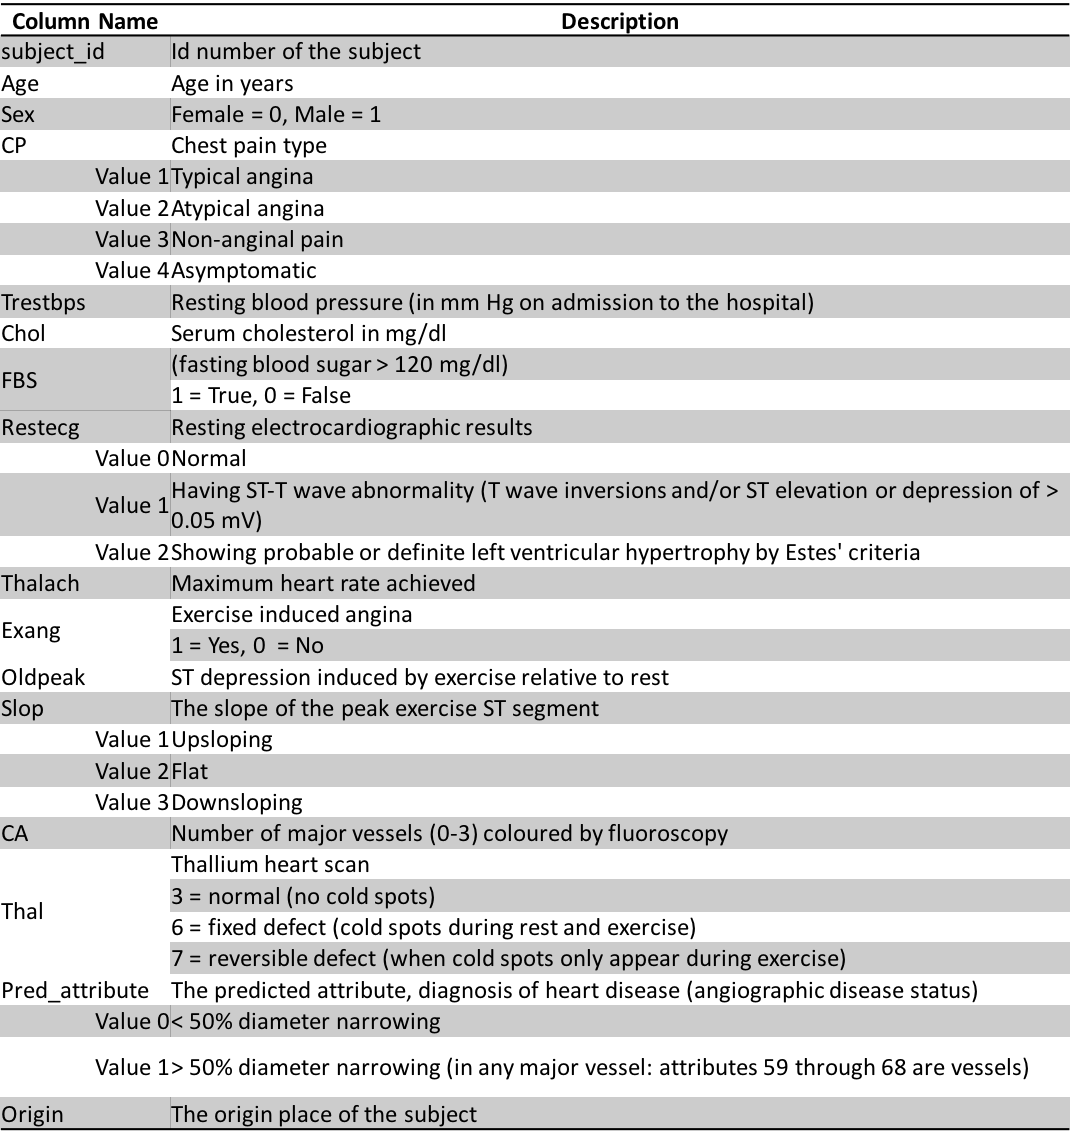

In [2]:
Image("/Users/didemiscan/Desktop/DSI_Course/Lectures/CapstoneProject/TopicPitchPresentation/ColumnDesc.png")

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
#warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)
#warnings.exceptions(action='ignore', category=UserWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
random_state = 1
#by assigning a random_state I will be using the same random models
np.random.seed(seed = 1)
#this fill fix my random arrays for the predicted values // each time I will have the same random list

In [10]:
data_dictionary = {"subject_id": "Id number of the subject" ,
                   "age": "Age in years", 
                   "sex": "Female = 0, Male = 1", 
                   "cp": "Chest pain type (value1:Typical angina, value2: Atypical angina, value3: Non-anginal pain, value4: Asymptomatic)", 
                   "trestbps": "Resting blood pressure (in mm Hg on admission to the hospital)" , 
                   "chol": "Serum cholestoral in mg/dl", 
                   "fbs": "fasting blood sugar (1 = True, 0 = False)", 
                   "restecg": "Resting electrocardiographic results (value0: Normal, value1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), value2: Showing probable or definite left ventricular hypertrophy by Estes' criteria)", 
                   "thalach": "Maximum heart rate achieved", 
                   "exang": "Exercise induced angina (1 = Yes, 0  = No)", 
                   "oldpeak": "ST depression induced by exercise relative to rest", 
                   "slop": "The slope of the peak exercise ST segment (value1: Upsloping, value2: flat, value3: Downsloping)", 
                   "ca": "Number of major vessels (0-3) colored by flourosopy", 
                   "thal": "Thalium heart scan (3 = normal (no cold spots), 6 = fixed defect (cold spots during rest and exercise), 7 = reversible defect (when cold spots only appear during exercise))", 
                   "pred_attribute": "The predicted attribute, diagnosis of heart disease (angiographic disease status) (value0: < 50% diameter narrowing, value1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels))",
                   "origin": "The origin place of the subject"}

### Importing the Data 

In [11]:
columns = ("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slop", "ca", "thal", "pred_attribute")

In [12]:
cleveland_data = pd.read_csv("/Users/didemiscan/Desktop/DSI_Course/Lectures/CapstoneProject/DataSet/xprizeai-health-heart-disease/uci-heart-disease/processed_cleveland_data.csv", header= None)
cleveland_data.columns = columns
cleveland_data['origin'] = 'Cleveland'
#cleveland_data.head()

In [13]:
switzerland_data = pd.read_csv("/Users/didemiscan/Desktop/DSI_Course/Lectures/CapstoneProject/DataSet/xprizeai-health-heart-disease/uci-heart-disease/processed_switzerland_data.csv", header = None)
switzerland_data.columns = columns
switzerland_data['origin'] = 'Switzerland'
#switzerland_data.head()

In [14]:
longbeachva_data = pd.read_csv("/Users/didemiscan/Desktop/DSI_Course/Lectures/CapstoneProject/DataSet/xprizeai-health-heart-disease/uci-heart-disease/processed_va_data.csv", header = None)
longbeachva_data.columns = columns
longbeachva_data['origin'] = 'LongBeach'
#longbeachva_data.head()

In [15]:
hungarian_data = pd.read_csv("/Users/didemiscan/Desktop/DSI_Course/Lectures/CapstoneProject/DataSet/xprizeai-health-heart-disease/uci-heart-disease/reprocessed_hungarian_data.csv", header = None)
hungarian_data.columns = columns
hungarian_data['origin'] = 'Hungarian'
#hungarian_data.head()

In [16]:
joins = [cleveland_data, switzerland_data, longbeachva_data, hungarian_data]
data = pd.concat(joins, ignore_index= True)
data.index.rename('subject_id', inplace= True)
data.reset_index(level=0, inplace=True)
data.head()

subject_id  age  sex  cp trestbps chol fbs restecg thalach exang oldpeak  \
0           0   63    1   1      145  233   1       2     150     0     2.3   
1           1   67    1   4      160  286   0       2     108     1     1.5   
2           2   67    1   4      120  229   0       2     129     1     2.6   
3           3   37    1   3      130  250   0       0     187     0     3.5   
4           4   41    0   2      130  204   0       2     172     0     1.4   

  slop ca thal  pred_attribute     origin  
0    3  0    6               0  Cleveland  
1    2  3    3               2  Cleveland  
2    2  2    7               1  Cleveland  
3    3  0    3               0  Cleveland  
4    1  0    3               0  Cleveland

In [17]:
data.shape

(920, 16)

In [18]:
data.describe(include='all')

subject_id         age         sex          cp  trestbps   chol  \
count   920.000000  920.000000  920.000000  920.000000     920.0  920.0   
unique         NaN         NaN         NaN         NaN     104.0  303.0   
top            NaN         NaN         NaN         NaN     120.0    0.0   
freq           NaN         NaN         NaN         NaN     102.0  123.0   
mean    459.500000   53.510870    0.789130    3.250000       NaN    NaN   
std     265.725422    9.424685    0.408148    0.930969       NaN    NaN   
min       0.000000   28.000000    0.000000    1.000000       NaN    NaN   
25%     229.750000   47.000000    1.000000    3.000000       NaN    NaN   
50%     459.500000   54.000000    1.000000    4.000000       NaN    NaN   
75%     689.250000   60.000000    1.000000    4.000000       NaN    NaN   
max     919.000000   77.000000    1.000000    4.000000       NaN    NaN   

          fbs  restecg thalach  exang  oldpeak   slop   ca   thal  \
count   920.0    920.0     920  920.0    920.0  920.0  920  920.0   
unique    6.0      8.0     192    6.0     80.0    8.0    8    8.0   
top       0.0      0.0       ?    0.0      0.0    2.0    ?   -9.0   
freq    524.0    466.0      54  408.0    288.0  231.0  320  266.0   
mean      NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
std       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
min       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
25%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
50%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
75%       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   
max       NaN      NaN     NaN    NaN      NaN    NaN  NaN    NaN   

        pred_attribute     origin  
count       920.000000        920  
unique             NaN          4  
top                NaN  Cleveland  
freq               NaN        303  
mean          1.133696        NaN  
std           1.258942        NaN  
min           0.000000        NaN  
25%           0.000000        NaN  
50%           1.000000        NaN  
75%           2.000000        NaN  
max           4.000000        NaN

In [19]:
data.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

### Checking the Missing Values

In [20]:
data[(data['trestbps'] == '?')].shape

(58, 16)

In [21]:
data[(data['chol'] == '?')].shape

(7, 16)

In [22]:
data[(data['fbs'] == '?')].shape

(82, 16)

In [23]:
data[(data['restecg'] == '?')].shape

(1, 16)

In [24]:
data[(data['thalach'] == '?')].shape

(54, 16)

In [25]:
data[(data['exang'] == '?')].shape

(54, 16)

In [26]:
data[(data['oldpeak'] == '?')].shape

(62, 16)

In [27]:
data[(data['slop'] == '?')].shape

(119, 16)

In [28]:
data[(data['ca'] == '?')].shape

(320, 16)

In [29]:
data[(data['thal'] == '?')].shape

(220, 16)

**Replacing all the '?' to NaN **

In [30]:
[data[data.columns[i]].replace('?',np.nan, inplace =True) for i in range(0, len(data.columns))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [31]:
data.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [32]:
data.dtypes

subject_id         int64
age                int64
sex                int64
cp                 int64
trestbps          object
chol              object
fbs               object
restecg           object
thalach           object
exang             object
oldpeak           object
slop              object
ca                object
thal              object
pred_attribute     int64
origin            object
dtype: object

** Changing the Data Types to floats **

In [33]:
df = data[['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute']].astype(float)

In [34]:
df['origin'] = data.origin

In [35]:
df.dtypes

subject_id        float64
age               float64
sex               float64
cp                float64
trestbps          float64
chol              float64
fbs               float64
restecg           float64
thalach           float64
exang             float64
oldpeak           float64
slop              float64
ca                float64
thal              float64
pred_attribute    float64
origin             object
dtype: object

In [36]:
df.describe()

subject_id         age         sex          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  862.000000  913.000000   
mean   459.500000   53.510870    0.789130    3.250000  131.968677  193.887185   
std    265.725422    9.424685    0.408148    0.930969   19.651971  114.139483   
min      0.000000   28.000000    0.000000    1.000000   -9.000000   -9.000000   
25%    229.750000   47.000000    1.000000    3.000000  120.000000  167.000000   
50%    459.500000   54.000000    1.000000    4.000000  130.000000  222.000000   
75%    689.250000   60.000000    1.000000    4.000000  140.000000  267.000000   
max    919.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak        slop  \
count  838.000000  919.000000  866.000000  866.000000  858.000000  801.000000   
mean     0.078759    0.594124  137.376443    0.378753    0.878788   -0.784020   
std      0.965846    0.865464   26.385477    0.582767    1.091226    4.616226   
min     -9.000000   -9.000000   -9.000000   -9.000000   -2.600000   -9.000000   
25%      0.000000    0.000000  120.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  140.000000    0.000000    0.500000    2.000000   
75%      0.000000    1.000000  157.000000    1.000000    1.500000    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal  pred_attribute  
count  600.000000  700.000000      920.000000  
mean    -3.986667   -0.265714        1.133696  
std      4.910874    7.007515        1.258942  
min     -9.000000   -9.000000        0.000000  
25%     -9.000000   -9.000000        0.000000  
50%      0.000000    3.000000        1.000000  
75%      0.000000    7.000000        2.000000  
max      9.000000    7.000000        4.000000

In [37]:
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [38]:
df.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [39]:
df.corr()

subject_id       age       sex        cp  trestbps      chol  \
subject_id        1.000000 -0.215586  0.046313 -0.075652  0.030370  0.035799   
age              -0.215586  1.000000  0.056889  0.166245  0.241348 -0.056786   
sex               0.046313  0.056889  1.000000  0.170392  0.016572 -0.175562   
cp               -0.075652  0.166245  0.170392  1.000000  0.035459 -0.106855   
trestbps          0.030370  0.241348  0.016572  0.035459  1.000000  0.072612   
chol              0.035799 -0.056786 -0.175562 -0.106855  0.072612  1.000000   
fbs              -0.122225  0.149837  0.094207  0.035608  0.086172 -0.066110   
restecg          -0.341769  0.196064 -0.020777  0.058051  0.079867  0.119683   
thalach          -0.178261 -0.355635 -0.163759 -0.333931 -0.053556  0.210071   
exang            -0.030919  0.178867  0.186268  0.375594  0.257686 -0.028022   
oldpeak          -0.150870  0.258243  0.103930  0.244245  0.148126  0.070114   
slop             -0.609516  0.389939  0.084032  0.320029  0.043381 -0.107739   
ca               -0.930058  0.405383 -0.038389  0.122921  0.005514  0.059731   
thal             -0.796862  0.365927  0.086906  0.221278  0.030514 -0.158492   
pred_attribute   -0.045676  0.280461  0.258224  0.405022  0.165424 -0.098056   

                     fbs   restecg   thalach     exang   oldpeak      slop  \
subject_id     -0.122225 -0.341769 -0.178261 -0.030919 -0.150870 -0.609516   
age             0.149837  0.196064 -0.355635  0.178867  0.258243  0.389939   
sex             0.094207 -0.020777 -0.163759  0.186268  0.103930  0.084032   
cp              0.035608  0.058051 -0.333931  0.375594  0.244245  0.320029   
trestbps        0.086172  0.079867 -0.053556  0.257686  0.148126  0.043381   
chol           -0.066110  0.119683  0.210071 -0.028022  0.070114 -0.107739   
fbs             1.000000  0.086927 -0.013337  0.032546  0.064382  0.125543   
restecg         0.086927  1.000000  0.046074  0.024689  0.119995  0.250590   
thalach        -0.013337  0.046074  1.000000 -0.189574 -0.155005 -0.165112   
exang           0.032546  0.024689 -0.189574  1.000000  0.308445  0.314035   
oldpeak         0.064382  0.119995 -0.155005  0.308445  1.000000  0.497289   
slop            0.125543  0.250590 -0.165112  0.314035  0.497289  1.000000   
ca              0.150423  0.423142  0.174357  0.067568  0.241648  0.666188   
thal            0.117859  0.320590 -0.008413  0.152492  0.192268  0.631928   
pred_attribute  0.109248  0.061876 -0.381984  0.382178  0.469537  0.371813   

                      ca      thal  pred_attribute  
subject_id     -0.930058 -0.796862       -0.045676  
age             0.405383  0.365927        0.280461  
sex            -0.038389  0.086906        0.258224  
cp              0.122921  0.221278        0.405022  
trestbps        0.005514  0.030514        0.165424  
chol            0.059731 -0.158492       -0.098056  
fbs             0.150423  0.117859        0.109248  
restecg         0.423142  0.320590        0.061876  
thalach         0.174357 -0.008413       -0.381984  
exang           0.067568  0.152492        0.382178  
oldpeak         0.241648  0.192268        0.469537  
slop            0.666188  0.631928        0.371813  
ca              1.000000  0.864182        0.106134  
thal            0.864182  1.000000        0.211016  
pred_attribute  0.106134  0.211016        1.000000

In [40]:
df.corr()[['pred_attribute']]

pred_attribute
subject_id           -0.045676
age                   0.280461
sex                   0.258224
cp                    0.405022
trestbps              0.165424
chol                 -0.098056
fbs                   0.109248
restecg               0.061876
thalach              -0.381984
exang                 0.382178
oldpeak               0.469537
slop                  0.371813
ca                    0.106134
thal                  0.211016
pred_attribute        1.000000

### Predicting Missing Values by using  decision tree/ bagging/ random forest 

** GridSearch Function to Find the Best Model **

In [41]:
def grid_search_func(estimator, params, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv,
        iid=False)

    gs.fit(X, y)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X)
    print('Test score: ', scoring_function(y, predictions))

    return gs

** Models **

In [42]:
#regressor
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()
model_bgr = BaggingRegressor()

#classifier
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_bgc = BaggingClassifier()

** Parameters for GridSearch **

In [48]:
#regressor
params_dtr = {'max_depth': list(range(1,11))+[None],'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfr = {'n_estimators': np.arange(10,100,10), 'max_depth': np.linspace(10,10,10), 
              'max_features': ['auto','sqrt'], 'bootstrap':['True','False']}
params_bgr = {'base_estimator':[None, DecisionTreeRegressor(),KNeighborsRegressor(),SVR()],
              'n_estimators':np.arange(10,100,10), 'max_samples':np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap':['True','False']}

#classifier
params_dtc = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,11), 'max_features':range(1,X.shape[1]+1),
              'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfc = {'criterion': ['gini', 'entropy'], 'n_estimators':np.arange(10,100,10), 
              #'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False'], 
              'max_features':['auto', 'sqrt', 'log2'], 'max_depth' : [1, 5, 10, 15, 20, 25, 30], 
              'min_samples_leaf' : [1, 2, 4, 6, 8, 10]}
params_bgc = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap': ['True','False']}

### Predicting Restecg

** Defining X&y values **

In [44]:
# Get Dummies for Categorical Values
df2 = df.copy()

df2 = pd.get_dummies(df2, columns=['sex','cp'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0         0.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1         1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2         2.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3         3.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4         4.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slop   ca  thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  
0   3.0  0.0   6.0             0.0  Cleveland        1       0       0       0  
1   2.0  3.0   3.0             2.0  Cleveland        1       0       0       1  
2   2.0  2.0   7.0             1.0  Cleveland        1       0       0       1  
3   3.0  0.0   3.0             0.0  Cleveland        1       0       1       0  
4   1.0  0.0   3.0             0.0  Cleveland        0       1       0       0

In [45]:
mask = df2['restecg'].isnull()

In [46]:
df2.columns

Index(['subject_id', 'age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'origin',
       'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0'],
      dtype='object')

In [47]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg']]

X.dropna(inplace=True)
y = X.pop('restecg')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0
0  63.0        1       0       0       0
1  67.0        1       0       0       1
2  67.0        1       0       0       1
3  37.0        1       0       1       0
4  41.0        0       1       0       0

** Finding Best Score by Using Grid Search ** 

In [49]:
y.value_counts(normalize=True)

 0.0    0.599565
 2.0    0.204570
 1.0    0.194777
-9.0    0.001088
Name: restecg, dtype: float64

- Baseline is proportion of majority class: 0 // (0.59)

In [50]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.46960600184664764

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.38741786831077696
Best score
-0.50316413032927

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.34669700844421336
Best score
-0.43772169183902754

Best estimator
{'base_estimator__alpha': 0.0001, 'base_estimator__class_weight': None, 'base_estimator__early_stoppin

In [51]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.6104461371055495


In [52]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.6245919477693145


In [53]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.5995647442872688


- From the analysis above I chose the ** gs_rfc ** as the best model, while it has the highest accuracy score which is larger than the baseline.

** Finding the Predicted Value ** 

In [54]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0']].dropna().index
preds = gs_rfc.best_estimator_.predict(df2[['age',  'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

In [55]:
df2.head()

subject_id   age  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0         0.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1         1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2         2.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3         3.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4         4.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slop   ca  thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  \
0   3.0  0.0   6.0             0.0  Cleveland        1       0       0   
1   2.0  3.0   3.0             2.0  Cleveland        1       0       0   
2   2.0  2.0   7.0             1.0  Cleveland        1       0       0   
3   3.0  0.0   3.0             0.0  Cleveland        1       0       1   
4   1.0  0.0   3.0             0.0  Cleveland        0       1       0   

   cp_4.0  predicted  
0       0        2.0  
1       1        0.0  
2       1        0.0  
3       0        0.0  
4       0        0.0

** Adding Predicted Column in the DataFrame **

In [56]:
df['restecg'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [57]:
df2['restecg'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0         0.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1         1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2         2.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3         3.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4         4.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slop   ca  thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  \
0   3.0  0.0   6.0             0.0  Cleveland        1       0       0   
1   2.0  3.0   3.0             2.0  Cleveland        1       0       0   
2   2.0  2.0   7.0             1.0  Cleveland        1       0       0   
3   3.0  0.0   3.0             0.0  Cleveland        1       0       1   
4   1.0  0.0   3.0             0.0  Cleveland        0       1       0   

   cp_4.0  predicted  
0       0        2.0  
1       1        0.0  
2       1        0.0  
3       0        0.0  
4       0        0.0

In [58]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0         0.0  63.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1         1.0  67.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2         2.0  67.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3         3.0  37.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4         4.0  41.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slop   ca  thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  
0   3.0  0.0   6.0             0.0  Cleveland        1       0       0       0  
1   2.0  3.0   3.0             2.0  Cleveland        1       0       0       1  
2   2.0  2.0   7.0             1.0  Cleveland        1       0       0       1  
3   3.0  0.0   3.0             0.0  Cleveland        1       0       1       0  
4   1.0  0.0   3.0             0.0  Cleveland        0       1       0       0

### Predicting Chol

** Defining X&y values **

In [59]:
#Get Dummies for Categorical Values
df2 = pd.get_dummies(df2, columns=['restecg'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

   thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0   6.0             0.0  Cleveland        1       0       0       0   
1   3.0             2.0  Cleveland        1       0       0       1   
2   7.0             1.0  Cleveland        1       0       0       1   
3   3.0             0.0  Cleveland        1       0       1       0   
4   3.0             0.0  Cleveland        0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  
0            0            0            1  
1            0            0            1  
2            0            0            1  
3            1            0            0  
4            0            0            1

In [60]:
mask = df2['chol'].isnull()

In [61]:
df2.columns

Index(['subject_id', 'age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute', 'origin', 'sex_1.0',
       'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0'],
      dtype='object')

In [62]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol']]

X.dropna(inplace=True)
y = X.pop('chol')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0  
0            1  
1            1  
2            1  
3            0  
4            1

** Finding Best Score by Using Grid Search ** 

In [63]:
y.mean()

193.88718510405258

In [64]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.8426290266789547

Best estimator
{'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.11380901830293155
Best score
-1.0716837041623457

Best estimator
{'bootstrap': 'False', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.3455586792942872
Best score
-0.4042421008488555

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__coef0': 0.0, 'base_estimator__degree': 3, 'base_estimator__epsilon': 0.1

- From analysis above, the scores of each model are below 0 which shows us the model is not good enough to predict. So I am using random sampling and predicting the missing 7 values with the existing values picked randomly. 

- Next I used the radom variables, but if I had more time I would try different models and try some of the models for my further modeling. I will look into that for on my the future analysis.

** Finding the Predicted Value ** 

In [65]:
rand_pred_y = np.random.choice(y, size=920, replace=True)
pred_y = pd.Series(rand_pred_y)

** Adding Predicted Column in the DataFrame **

In [66]:
df['chol'].fillna(pred_y, inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [67]:
df2['chol'].fillna(pred_y, inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

   thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0   6.0             0.0  Cleveland        1       0       0       0   
1   3.0             2.0  Cleveland        1       0       0       1   
2   7.0             1.0  Cleveland        1       0       0       1   
3   3.0             0.0  Cleveland        1       0       1       0   
4   3.0             0.0  Cleveland        0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  
0            0            0            1  
1            0            0            1  
2            0            0            1  
3            1            0            0  
4            0            0            1

### Predicting Thalac

** Defining X&y values **

In [68]:
mask = df2['thalach'].isnull()

In [69]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 'thalach']]

X.dropna(inplace=True)
y = X.pop('thalach')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  
0            1  233.0  
1            1  286.0  
2            1  229.0  
3            0  250.0  
4            1  204.0

** Finding Best Score by Using Grid Search ** 

In [70]:
y.mean()

137.37644341801385

In [71]:
y.median()

140.0

In [72]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.06203544253040809

Best estimator
{'criterion': 'mse', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.27719559541030314
Best score
0.0005575896883137865

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.6884143612411331
Best score
-0.014428972809839857

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 5, 'max_samples': 1.0, 'n_estimators': 90, 'n_jobs': Non

- From analysis above, by comparing the scores for each model, I decided to pick the ** gs_rfr ** model as the best model. Rfr has the highest score and greater than 0. 

** Finding the Predicted Value ** 

In [73]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0',
           'chol']].dropna().index
preds = gs_rfr.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

In [74]:
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

      ...      pred_attribute     origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0     ...                 0.0  Cleveland       1       0       0       0   
1     ...                 2.0  Cleveland       1       0       0       1   
2     ...                 1.0  Cleveland       1       0       0       1   
3     ...                 0.0  Cleveland       1       0       1       0   
4     ...                 0.0  Cleveland       0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0   predicted  
0            0            0            1  145.658509  
1            0            0            1  124.548716  
2            0            0            1  125.425065  
3            1            0            0  173.175628  
4            0            0            1  173.229127  

[5 rows x 21 columns]

** Adding Predicted Column in the DataFrame **

In [75]:
df['thalach'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [76]:
df2['thalach'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

      ...      pred_attribute     origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0     ...                 0.0  Cleveland       1       0       0       0   
1     ...                 2.0  Cleveland       1       0       0       1   
2     ...                 1.0  Cleveland       1       0       0       1   
3     ...                 0.0  Cleveland       1       0       1       0   
4     ...                 0.0  Cleveland       0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0   predicted  
0            0            0            1  145.658509  
1            0            0            1  124.548716  
2            0            0            1  125.425065  
3            1            0            0  173.175628  
4            0            0            1  173.229127  

[5 rows x 21 columns]

In [77]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

   thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0   6.0             0.0  Cleveland        1       0       0       0   
1   3.0             2.0  Cleveland        1       0       0       1   
2   7.0             1.0  Cleveland        1       0       0       1   
3   3.0             0.0  Cleveland        1       0       1       0   
4   3.0             0.0  Cleveland        0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  
0            0            0            1  
1            0            0            1  
2            0            0            1  
3            1            0            0  
4            0            0            1

### Predicting Exang

** Defining X&y values **

In [78]:
mask = df2['exang'].isnull()

In [79]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach','exang']]

X.dropna(inplace=True)
y = X.pop('exang')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  
0            1  233.0    150.0  
1            1  286.0    108.0  
2            1  229.0    129.0  
3            0  250.0    187.0  
4            1  204.0    172.0

** Finding Best Score by Using Grid Search ** 

In [80]:
y.value_counts(normalize=True)

 0.0    0.609700
 1.0    0.389145
-9.0    0.001155
Name: exang, dtype: float64

- Baseline is proportion of majority class: 0 (61%)

In [81]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
-0.07395307990099606

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.038230530966494536
Best score
-0.08287818873252331

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  -0.062058772660807504
Best score
-0.2350395041671419

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 5, 'max_sa

In [82]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7621247113163973


In [83]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7321016166281755


In [84]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9515011547344111


- By comparing the baseline with accuracy scores of each model, I can conclude that the best model for prediction will be **gs_dtc** with the highest score.

** Finding the Predicted Value ** 

In [85]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach']].dropna().index
preds = gs_dtc.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0',
                            'chol','thalach']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [86]:
df2['exang'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

     ...      pred_attribute     origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0    ...                 0.0  Cleveland       1       0       0       0   
1    ...                 2.0  Cleveland       1       0       0       1   
2    ...                 1.0  Cleveland       1       0       0       1   
3    ...                 0.0  Cleveland       1       0       1       0   
4    ...                 0.0  Cleveland       0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  predicted  
0            0            0            1        0.0  
1            0            0            1        1.0  
2            0            0            1        1.0  
3            1            0            0        0.0  
4            0            0            1        0.0  

[5 rows x 21 columns]

In [87]:
df['exang'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [88]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  exang  oldpeak  slop   ca  \
0         0.0  63.0     145.0  233.0  1.0    150.0    0.0      2.3   3.0  0.0   
1         1.0  67.0     160.0  286.0  0.0    108.0    1.0      1.5   2.0  3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0    1.0      2.6   2.0  2.0   
3         3.0  37.0     130.0  250.0  0.0    187.0    0.0      3.5   3.0  0.0   
4         4.0  41.0     130.0  204.0  0.0    172.0    0.0      1.4   1.0  0.0   

   thal  pred_attribute     origin  sex_1.0  cp_2.0  cp_3.0  cp_4.0  \
0   6.0             0.0  Cleveland        1       0       0       0   
1   3.0             2.0  Cleveland        1       0       0       1   
2   7.0             1.0  Cleveland        1       0       0       1   
3   3.0             0.0  Cleveland        1       0       1       0   
4   3.0             0.0  Cleveland        0       1       0       0   

   restecg_0.0  restecg_1.0  restecg_2.0  
0            0            0            1  
1            0            0            1  
2            0            0            1  
3            1            0            0  
4            0            0            1

### Predicting Trestbps

** Defining X&y values **

In [89]:
#Get Dummies for Categorical Values
df2 = pd.get_dummies(df2, columns=['exang'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

     ...         origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  \
0    ...      Cleveland       1       0       0       0            0   
1    ...      Cleveland       1       0       0       1            0   
2    ...      Cleveland       1       0       0       1            0   
3    ...      Cleveland       1       0       1       0            1   
4    ...      Cleveland       0       1       0       0            0   

   restecg_1.0  restecg_2.0  exang_0.0  exang_1.0  
0            0            1          1          0  
1            0            1          0          1  
2            0            1          0          1  
3            0            0          1          0  
4            0            1          1          0  

[5 rows x 21 columns]

In [90]:
mask = df2['trestbps'].isnull()

In [91]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps']]

X.dropna(inplace=True)
y = X.pop('trestbps')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  exang_0.0  exang_1.0  
0            1  233.0    150.0          1          0  
1            1  286.0    108.0          0          1  
2            1  229.0    129.0          0          1  
3            0  250.0    187.0          1          0  
4            1  204.0    172.0          1          0

** Finding Best Score by Using Grid Search ** 

In [92]:
y.mean()

131.96867749419954

In [93]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.024520771513565288

Best estimator
{'criterion': 'mse', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.10449658585086652
Best score
0.005755721185184681

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.6475999510279218
Best score
0.04278159748807804

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'ba

- The model with the highest score is **gs_bgr**. I used **gs_bgr** as the best model to predict null values.

** Finding the Predicted Value ** 

In [94]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol',
           'thalach', 'exang_0.0', 'exang_1.0']].dropna().index
preds = gs_bgr.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0','restecg_1.0',
                                            'restecg_2.0','chol','thalach', 'exang_0.0', 'exang_1.0']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [95]:
df['trestbps'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [96]:
df2['trestbps'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

      ...      sex_1.0 cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0     ...            1      0       0       0            0            0   
1     ...            1      0       0       1            0            0   
2     ...            1      0       0       1            0            0   
3     ...            1      0       1       0            1            0   
4     ...            0      1       0       0            0            0   

   restecg_2.0  exang_0.0  exang_1.0   predicted  
0            1          1          0  135.186667  
1            1          0          1  138.760000  
2            1          0          1  136.073333  
3            0          1          0  126.353333  
4            1          1          0  124.593333  

[5 rows x 22 columns]

In [97]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

     ...         origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  \
0    ...      Cleveland       1       0       0       0            0   
1    ...      Cleveland       1       0       0       1            0   
2    ...      Cleveland       1       0       0       1            0   
3    ...      Cleveland       1       0       1       0            1   
4    ...      Cleveland       0       1       0       0            0   

   restecg_1.0  restecg_2.0  exang_0.0  exang_1.0  
0            0            1          1          0  
1            0            1          0          1  
2            0            1          0          1  
3            0            0          1          0  
4            0            1          1          0  

[5 rows x 21 columns]

### Predicting Oldpeak

** Defining X&y values **

In [98]:
mask = df2['oldpeak'].isnull()

In [99]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak']]

X.dropna(inplace=True)
y = X.pop('oldpeak')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  exang_0.0  exang_1.0  trestbps  
0            1  233.0    150.0          1          0     145.0  
1            1  286.0    108.0          0          1     160.0  
2            1  229.0    129.0          0          1     120.0  
3            0  250.0    187.0          1          0     130.0  
4            1  204.0    172.0          1          0     130.0

** Finding Best Score by Using Grid Search ** 

In [100]:
gs_dtr = grid_search_func(model_dtr, params_dtr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfr = grid_search_func(model_rfr, params_rfr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgr = grid_search_func(model_bgr, params_bgr, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.14844482252936797

Best estimator
{'criterion': 'mse', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.22173846243542106
Best score
0.14652513938572986

Best estimator
{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10.0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 90, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.7242004993027984
Best score
0.15555822472953781

Best estimator
{'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'ba

- From the analysis above, the highes score is ** gs_dtr ** . I used **gs_dtr** as to predict the null values.

** Finding the Predicted Value ** 

In [101]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps']].dropna().index
preds = gs_dtr.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol','thalach', 'exang_0.0', 'exang_1.0', 
                                            'trestbps']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [102]:
df2['oldpeak'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

     ...      sex_1.0 cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0    ...            1      0       0       0            0            0   
1    ...            1      0       0       1            0            0   
2    ...            1      0       0       1            0            0   
3    ...            1      0       1       0            1            0   
4    ...            0      1       0       0            0            0   

   restecg_2.0  exang_0.0  exang_1.0  predicted  
0            1          1          0   1.022667  
1            1          0          1   1.549802  
2            1          0          1   1.549802  
3            0          1          0   0.341176  
4            1          1          0   0.341176  

[5 rows x 22 columns]

In [103]:
df['oldpeak'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [104]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

     ...         origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  \
0    ...      Cleveland       1       0       0       0            0   
1    ...      Cleveland       1       0       0       1            0   
2    ...      Cleveland       1       0       0       1            0   
3    ...      Cleveland       1       0       1       0            1   
4    ...      Cleveland       0       1       0       0            0   

   restecg_1.0  restecg_2.0  exang_0.0  exang_1.0  
0            0            1          1          0  
1            0            1          0          1  
2            0            1          0          1  
3            0            0          1          0  
4            0            1          1          0  

[5 rows x 21 columns]

### Predicting FBS

** Defining X&y values **

In [105]:
mask = df2['fbs'].isnull()

In [106]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach','exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak', 'fbs']]

X.dropna(inplace=True)
y = X.pop('fbs')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  exang_0.0  exang_1.0  trestbps  oldpeak  
0            1  233.0    150.0          1          0     145.0      2.3  
1            1  286.0    108.0          0          1     160.0      1.5  
2            1  229.0    129.0          0          1     120.0      2.6  
3            0  250.0    187.0          1          0     130.0      3.5  
4            1  204.0    172.0          1          0     130.0      1.4

** Finding Best Score by Using Grid Search ** 

In [107]:
y.value_counts(normalize=True)

 0.0    0.825776
 1.0    0.164678
-9.0    0.009547
Name: fbs, dtype: float64

- Baseline is proportion of majority class: 0 // (83%)

In [108]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.1269253981476705

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.008711440413747606
Best score
-0.004412357416139034

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.02023805157172731
Best score
-0.004186354202930853

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 4, 'm

In [109]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8400954653937948


In [110]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.850835322195704


In [111]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.8794749403341289


- By comparing the accuracy scores with the best line, the best model is **gs_bgc**. I used **gs_bgc** to predict the null values.

** Finding the Predicted Value ** 

In [112]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak']].dropna().index
preds = gs_bgc.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol','thalach', 'exang_0.0', 'exang_1.0', 
                                            'trestbps', 'oldpeak']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [113]:
df2['fbs'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [114]:
df['fbs'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [115]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  fbs  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0  1.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0  0.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0  0.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0  0.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0  0.0    172.0      1.4   1.0  0.0   3.0   

     ...         origin sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  \
0    ...      Cleveland       1       0       0       0            0   
1    ...      Cleveland       1       0       0       1            0   
2    ...      Cleveland       1       0       0       1            0   
3    ...      Cleveland       1       0       1       0            1   
4    ...      Cleveland       0       1       0       0            0   

   restecg_1.0  restecg_2.0  exang_0.0  exang_1.0  
0            0            1          1          0  
1            0            1          0          1  
2            0            1          0          1  
3            0            0          1          0  
4            0            1          1          0  

[5 rows x 21 columns]

### Predicting Slop

** Defining X&y values **

In [116]:
df2 = pd.get_dummies(df2, columns=['fbs'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   

   pred_attribute   ...    cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0             0.0   ...         0       0       0            0            0   
1             2.0   ...         0       0       1            0            0   
2             1.0   ...         0       0       1            0            0   
3             0.0   ...         0       1       0            1            0   
4             0.0   ...         1       0       0            0            0   

   restecg_2.0  exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  
0            1          1          0        0        1  
1            1          0          1        1        0  
2            1          0          1        1        0  
3            0          1          0        1        0  
4            1          1          0        1        0  

[5 rows x 22 columns]

In [117]:
mask = df2['slop'].isnull()

In [118]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak', 'fbs_0.0', 'fbs_1.0', 'slop']]

X.dropna(inplace=True)
y = X.pop('slop')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  exang_0.0  exang_1.0  trestbps  oldpeak  \
0            1  233.0    150.0          1          0     145.0      2.3   
1            1  286.0    108.0          0          1     160.0      1.5   
2            1  229.0    129.0          0          1     120.0      2.6   
3            0  250.0    187.0          1          0     130.0      3.5   
4            1  204.0    172.0          1          0     130.0      1.4   

   fbs_0.0  fbs_1.0  
0        0        1  
1        1        0  
2        1        0  
3        1        0  
4        1        0

** Finding Best Score by Using Grid Search ** 

In [119]:
y.value_counts(normalize=True)

 2.0    0.430712
 1.0    0.253433
-9.0    0.237203
 3.0    0.078652
Name: slop, dtype: float64

- Baseline is proportion of majority class: 2 // (43%)

In [120]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.5154967448713852

Best estimator
{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  -0.09909670750008281
Best score
0.5117311569735

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.5392322870569914
Best score
0.5298106603867921

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 5, 'max_samples': 0.8,

In [121]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.5955056179775281


In [122]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7203495630461922


In [123]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.968789013732834


- By comparing the accuracy scores with the baseline, the best model is **gs_bgc**.

** Finding the Predicted Value ** 

In [124]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0']].dropna().index
preds = gs_bgc.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol','thalach', 'exang_0.0', 'exang_1.0', 
                                            'trestbps', 'oldpeak', 'fbs_0.0', 'fbs_1.0']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [125]:
df2['slop'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   

   pred_attribute    ...     cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0             0.0    ...          0       0            0            0   
1             2.0    ...          0       1            0            0   
2             1.0    ...          0       1            0            0   
3             0.0    ...          1       0            1            0   
4             0.0    ...          0       0            0            0   

   restecg_2.0  exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  predicted  
0            1          1          0        0        1        3.0  
1            1          0          1        1        0        2.0  
2            1          0          1        1        0        2.0  
3            0          1          0        1        0        3.0  
4            1          1          0        1        0        1.0  

[5 rows x 23 columns]

In [126]:
df['slop'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [127]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak  slop   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3   3.0  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5   2.0  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6   2.0  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5   3.0  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4   1.0  0.0   3.0   

   pred_attribute   ...    cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0             0.0   ...         0       0       0            0            0   
1             2.0   ...         0       0       1            0            0   
2             1.0   ...         0       0       1            0            0   
3             0.0   ...         0       1       0            1            0   
4             0.0   ...         1       0       0            0            0   

   restecg_2.0  exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  
0            1          1          0        0        1  
1            1          0          1        1        0  
2            1          0          1        1        0  
3            0          1          0        1        0  
4            1          1          0        1        0  

[5 rows x 22 columns]

### Predicting Thal

** Defining X&y values **

In [128]:
df2 = pd.get_dummies(df2, columns=['slop'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0   3.0   

   pred_attribute     origin    ...     restecg_0.0  restecg_1.0  restecg_2.0  \
0             0.0  Cleveland    ...               0            0            1   
1             2.0  Cleveland    ...               0            0            1   
2             1.0  Cleveland    ...               0            0            1   
3             0.0  Cleveland    ...               1            0            0   
4             0.0  Cleveland    ...               0            0            1   

   exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  
0          1          0        0        1         0         0         1  
1          0          1        1        0         0         1         0  
2          0          1        1        0         0         1         0  
3          1          0        1        0         0         0         1  
4          1          0        1        0         1         0         0  

[5 rows x 24 columns]

In [129]:
mask = df2['thal'].isnull()

In [130]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol', 
                    'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0', 'slop_1.0', 
                    'slop_2.0', 'slop_3.0','thal']]

X.dropna(inplace=True)
y = X.pop('thal')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach  exang_0.0  exang_1.0  trestbps  oldpeak  \
0            1  233.0    150.0          1          0     145.0      2.3   
1            1  286.0    108.0          0          1     160.0      1.5   
2            1  229.0    129.0          0          1     120.0      2.6   
3            0  250.0    187.0          1          0     130.0      3.5   
4            1  204.0    172.0          1          0     130.0      1.4   

   fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  
0        0        1         0         0         1  
1        1        0         0         1         0  
2        1        0         0         1         0  
3        1        0         0         0         1  
4        1        0         1         0         0

** Finding Best Score by Using Grid Search ** 

In [131]:
y.value_counts(normalize=True)

-9.0    0.380000
 3.0    0.280000
 7.0    0.274286
 6.0    0.065714
Name: thal, dtype: float64

- Baseline is proportion of majority class: -9 // (38%)

In [132]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.2487386336910682

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.3297222598184958
Best score
0.37608673508417423

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.8356279823486745
Best score
0.2668723404426502

Best estimator
{'base_estimator': None, 'bootstrap': 'False', 'bootstrap_features': False, 'max_features': 5, 'max_samples'

In [133]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.72


In [134]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9571428571428572


In [135]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.97


- The best model with the highest score is **gs_bgc**. I predicted the null values by using **gs_bgc** model.

** Finding the Predicted Value ** 

In [136]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol',
           'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0', 'slop_1.0', 
           'slop_2.0', 'slop_3.0']].dropna().index
preds = gs_bgc.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol', 'thalach', 'exang_0.0', 'exang_1.0', 
                                            'trestbps', 'oldpeak', 'fbs_0.0', 'fbs_1.0','slop_1.0', 'slop_2.0', 
                                            'slop_3.0']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [137]:
df2['thal'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0   3.0   

   pred_attribute     origin    ...      restecg_1.0  restecg_2.0  exang_0.0  \
0             0.0  Cleveland    ...                0            1          1   
1             2.0  Cleveland    ...                0            1          0   
2             1.0  Cleveland    ...                0            1          0   
3             0.0  Cleveland    ...                0            0          1   
4             0.0  Cleveland    ...                0            1          1   

   exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  predicted  
0          0        0        1         0         0         1        6.0  
1          1        1        0         0         1         0        3.0  
2          1        1        0         0         1         0        7.0  
3          0        1        0         0         0         1        3.0  
4          0        1        0         1         0         0        3.0  

[5 rows x 25 columns]

In [138]:
df['thal'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [139]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  thal  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0   6.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0   3.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0   7.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0   3.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0   3.0   

   pred_attribute     origin    ...     restecg_0.0  restecg_1.0  restecg_2.0  \
0             0.0  Cleveland    ...               0            0            1   
1             2.0  Cleveland    ...               0            0            1   
2             1.0  Cleveland    ...               0            0            1   
3             0.0  Cleveland    ...               1            0            0   
4             0.0  Cleveland    ...               0            0            1   

   exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  slop_2.0  slop_3.0  
0          1          0        0        1         0         0         1  
1          0          1        1        0         0         1         0  
2          0          1        1        0         0         1         0  
3          1          0        1        0         0         0         1  
4          1          0        1        0         1         0         0  

[5 rows x 24 columns]

### Predicting CA

** Defining X&y values **

In [140]:
#Get Dummies for Categorical Values
df2 = pd.get_dummies(df2, columns=['thal'], drop_first=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  pred_attribute  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0             0.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0             2.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0             1.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0             0.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0             0.0   

      origin  sex_1.0    ...     exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  \
0  Cleveland        1    ...             1          0        0        1   
1  Cleveland        1    ...             0          1        1        0   
2  Cleveland        1    ...             0          1        1        0   
3  Cleveland        1    ...             1          0        1        0   
4  Cleveland        0    ...             1          0        1        0   

   slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
0         0         0         1         0         1         0  
1         0         1         0         1         0         0  
2         0         1         0         0         0         1  
3         0         0         1         1         0         0  
4         1         0         0         1         0         0  

[5 rows x 26 columns]

In [141]:
mask = df2['ca'].isnull()

In [142]:
X = df2.loc[~mask, ['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol',
                   'thalach', 'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0', 'slop_1.0', 
                    'slop_2.0', 'slop_3.0','thal_3.0','thal_6.0', 'thal_7.0', 'ca']]

X.dropna(inplace=True)
y = X.pop('ca')

X.head()

age  sex_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  \
0  63.0        1       0       0       0            0            0   
1  67.0        1       0       0       1            0            0   
2  67.0        1       0       0       1            0            0   
3  37.0        1       0       1       0            1            0   
4  41.0        0       1       0       0            0            0   

   restecg_2.0   chol  thalach    ...     trestbps  oldpeak  fbs_0.0  fbs_1.0  \
0            1  233.0    150.0    ...        145.0      2.3        0        1   
1            1  286.0    108.0    ...        160.0      1.5        1        0   
2            1  229.0    129.0    ...        120.0      2.6        1        0   
3            0  250.0    187.0    ...        130.0      3.5        1        0   
4            1  204.0    172.0    ...        130.0      1.4        1        0   

   slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
0         0         0         1         0         1         0  
1         0         1         0         1         0         0  
2         0         1         0         0         0         1  
3         0         0         1         1         0         0  
4         1         0         0         1         0         0  

[5 rows x 22 columns]

** Finding Best Score by Using Grid Search ** 

In [143]:
y.value_counts(normalize=True)

-9.0    0.483333
 0.0    0.301667
 1.0    0.111667
 2.0    0.068333
 3.0    0.033333
 9.0    0.001667
Name: ca, dtype: float64

- Baseline is proportion of majority class: -9 // (48%)

In [144]:
gs_dtc = grid_search_func(model_dtc, params_dtc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_rfc = grid_search_func(model_rfc, params_rfc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)
gs_bgc = grid_search_func(model_bgc, params_bgc, X, y, scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.7101219491001457

Best estimator
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Test score:  0.5923408913444375
Best score
0.8043198244301074

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 90, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.9110473841700801
Best score
0.4776902074236954

Best estimator
{'base_estimator': None, 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 5, 'max_samples':

In [145]:
y_pred_class = gs_dtc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.7516666666666667


In [146]:
y_pred_class = gs_rfc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.9366666666666666


In [147]:
y_pred_class = gs_bgc.best_estimator_.predict(X)

print(metrics.accuracy_score(y, y_pred_class))

0.98


- From the analysis above, the best model is **gs_bgc**. I used **gs_bgc** to predict the null values.

** Finding the Predicted Value ** 

In [148]:
idx = df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 'restecg_1.0','restecg_2.0','chol','thalach',
           'exang_0.0', 'exang_1.0', 'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0', 'slop_1.0', 'slop_2.0', 'slop_3.0', 
           'thal_3.0','thal_6.0','thal_7.0']].dropna().index
preds = gs_bgc.best_estimator_.predict(df2[['age', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0','restecg_0.0', 
                                            'restecg_1.0','restecg_2.0','chol','thalach', 'exang_0.0', 'exang_1.0', 
                                            'trestbps', 'oldpeak','fbs_0.0', 'fbs_1.0','slop_1.0', 'slop_2.0', 
                                            'slop_3.0', 'thal_3.0','thal_6.0', 'thal_7.0']].dropna())
preds = pd.Series(preds, index = idx)
df2['predicted'] = preds

** Adding Predicted Column in the DataFrame **

In [149]:
df2['ca'].fillna(df2['predicted'], inplace=True)
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  pred_attribute  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0             0.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0             2.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0             1.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0             0.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0             0.0   

      origin  sex_1.0    ...      exang_1.0  fbs_0.0  fbs_1.0  slop_1.0  \
0  Cleveland        1    ...              0        0        1         0   
1  Cleveland        1    ...              1        1        0         0   
2  Cleveland        1    ...              1        1        0         0   
3  Cleveland        1    ...              0        1        0         0   
4  Cleveland        0    ...              0        1        0         1   

   slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  predicted  
0         0         1         0         1         0        0.0  
1         1         0         1         0         0        3.0  
2         1         0         0         0         1        2.0  
3         0         1         1         0         0        0.0  
4         0         0         1         0         0        0.0  

[5 rows x 27 columns]

In [150]:
df['ca'].fillna(df2['predicted'], inplace=True)
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [151]:
df2.pop('predicted')
df2.head()

subject_id   age  trestbps   chol  thalach  oldpeak   ca  pred_attribute  \
0         0.0  63.0     145.0  233.0    150.0      2.3  0.0             0.0   
1         1.0  67.0     160.0  286.0    108.0      1.5  3.0             2.0   
2         2.0  67.0     120.0  229.0    129.0      2.6  2.0             1.0   
3         3.0  37.0     130.0  250.0    187.0      3.5  0.0             0.0   
4         4.0  41.0     130.0  204.0    172.0      1.4  0.0             0.0   

      origin  sex_1.0    ...     exang_0.0  exang_1.0  fbs_0.0  fbs_1.0  \
0  Cleveland        1    ...             1          0        0        1   
1  Cleveland        1    ...             0          1        1        0   
2  Cleveland        1    ...             0          1        1        0   
3  Cleveland        1    ...             1          0        1        0   
4  Cleveland        0    ...             1          0        1        0   

   slop_1.0  slop_2.0  slop_3.0  thal_3.0  thal_6.0  thal_7.0  
0         0         0         1         0         1         0  
1         0         1         0         1         0         0  
2         0         1         0         0         0         1  
3         0         0         1         1         0         0  
4         1         0         0         1         0         0  

[5 rows x 26 columns]

In [152]:
df2.isnull().sum()


subject_id        0
age               0
trestbps          0
chol              0
thalach           0
oldpeak           0
ca                0
pred_attribute    0
origin            0
sex_1.0           0
cp_2.0            0
cp_3.0            0
cp_4.0            0
restecg_0.0       0
restecg_1.0       0
restecg_2.0       0
exang_0.0         0
exang_1.0         0
fbs_0.0           0
fbs_1.0           0
slop_1.0          0
slop_2.0          0
slop_3.0          0
thal_3.0          0
thal_6.0          0
thal_7.0          0
dtype: int64

In [153]:
df.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

In [154]:
df.corr()[['pred_attribute']]

pred_attribute
subject_id           -0.045676
age                   0.280461
sex                   0.258224
cp                    0.405022
trestbps              0.161561
chol                 -0.101723
fbs                   0.103100
restecg               0.061939
thalach              -0.372177
exang                 0.374724
oldpeak               0.454812
slop                  0.359766
ca                   -0.044599
thal                  0.227749
pred_attribute        1.000000

** Saved the dataframes as csv files ** 

In [155]:
#df.to_csv(path_or_buf='../part-04/df_nonull.csv' ,index=False)
#df2.to_csv(path_or_buf='../part-04//df_dum.csv', index=False)

In [156]:
df = pd.read_csv('../part-04/df_nonull.csv')
df2 = pd.read_csv('../part-04/df_dum.csv')

# 3. EDA

Here I looked at the correlations, and different graphs. I used pairplot, hist and boxplot to inspect the distribution and relationship between the columns. 
- Correlation to see the relationship between columns
- Boxplot to see the outliers 
- Hist to compare the distribution and check the outliers and skewness



In [157]:
df.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             2.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
subject_id        920 non-null float64
age               920 non-null float64
sex               920 non-null float64
cp                920 non-null float64
trestbps          920 non-null float64
chol              920 non-null float64
fbs               920 non-null float64
restecg           920 non-null float64
thalach           920 non-null float64
exang             920 non-null float64
oldpeak           920 non-null float64
slop              920 non-null float64
ca                920 non-null float64
thal              920 non-null float64
pred_attribute    920 non-null float64
origin            920 non-null object
dtypes: float64(15), object(1)
memory usage: 115.1+ KB


In [159]:
df.describe()

subject_id         age         sex          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   459.500000   53.510870    0.789130    3.250000  132.114906  193.793478   
std    265.725422    9.424685    0.408148    0.930969   19.050619  114.211965   
min      0.000000   28.000000    0.000000    1.000000   -9.000000   -9.000000   
25%    229.750000   47.000000    1.000000    3.000000  120.000000  166.750000   
50%    459.500000   54.000000    1.000000    4.000000  130.000000  222.000000   
75%    689.250000   60.000000    1.000000    4.000000  140.000000  267.000000   
max    919.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak        slop  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean     0.072826    0.593478  136.964351    0.383696    0.890679   -0.534783   
std      0.922527    0.865215   25.877566    0.578501    1.060779    4.465670   
min     -9.000000   -9.000000   -9.000000   -9.000000   -2.600000   -9.000000   
25%      0.000000    0.000000  120.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  139.000000    0.000000    0.600000    2.000000   
75%      0.000000    1.000000  156.000000    1.000000    1.512451    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal  pred_attribute  
count  920.000000  920.000000      920.000000  
mean    -5.065217    0.441304        1.133696  
std      4.767053    7.019856        1.258942  
min     -9.000000   -9.000000        0.000000  
25%     -9.000000   -9.000000        0.000000  
50%     -9.000000    3.000000        1.000000  
75%      0.000000    7.000000        2.000000  
max      9.000000    7.000000        4.000000

In [160]:
df.corr()

subject_id       age       sex        cp  trestbps      chol  \
subject_id        1.000000 -0.215586  0.046313 -0.075652  0.033118  0.035226   
age              -0.215586  1.000000  0.056889  0.166245  0.239996 -0.057013   
sex               0.046313  0.056889  1.000000  0.170392  0.019811 -0.175027   
cp               -0.075652  0.166245  0.170392  1.000000  0.037023 -0.107614   
trestbps          0.033118  0.239996  0.019811  0.037023  1.000000  0.068092   
chol              0.035226 -0.057013 -0.175027 -0.107614  0.068092  1.000000   
fbs              -0.118857  0.145273  0.089959  0.029457  0.083778 -0.045732   
restecg          -0.341181  0.197103 -0.021154  0.057414  0.082165  0.117865   
thalach          -0.180671 -0.367153 -0.167890 -0.320184 -0.056531  0.210555   
exang            -0.028325  0.176161  0.186355  0.395501  0.254792 -0.021066   
oldpeak          -0.146251  0.261804  0.107491  0.244325  0.148348  0.068536   
slop             -0.571580  0.390614  0.098060  0.296546  0.062317 -0.112324   
ca               -0.751463  0.183140 -0.126199 -0.013731 -0.006115  0.213572   
thal             -0.690943  0.370398  0.121385  0.222697  0.005717 -0.234970   
pred_attribute   -0.045676  0.280461  0.258224  0.405022  0.161561 -0.101723   

                     fbs   restecg   thalach     exang   oldpeak      slop  \
subject_id     -0.118857 -0.341181 -0.180671 -0.028325 -0.146251 -0.571580   
age             0.145273  0.197103 -0.367153  0.176161  0.261804  0.390614   
sex             0.089959 -0.021154 -0.167890  0.186355  0.107491  0.098060   
cp              0.029457  0.057414 -0.320184  0.395501  0.244325  0.296546   
trestbps        0.083778  0.082165 -0.056531  0.254792  0.148348  0.062317   
chol           -0.045732  0.117865  0.210555 -0.021066  0.068536 -0.112324   
fbs             1.000000  0.087572 -0.016928  0.039336  0.066341  0.134134   
restecg         0.087572  1.000000  0.044471  0.029354  0.119152  0.246421   
thalach        -0.016928  0.044471  1.000000 -0.189612 -0.160917 -0.187355   
exang           0.039336  0.029354 -0.189612  1.000000  0.317625  0.312862   
oldpeak         0.066341  0.119152 -0.160917  0.317625  1.000000  0.467766   
slop            0.134134  0.246421 -0.187355  0.312862  0.467766  1.000000   
ca              0.077785  0.353682  0.250365 -0.035898  0.140850  0.393530   
thal            0.114331  0.258531 -0.062276  0.144751  0.178023  0.589053   
pred_attribute  0.103100  0.061939 -0.372177  0.374724  0.454812  0.359766   

                      ca      thal  pred_attribute  
subject_id     -0.751463 -0.690943       -0.045676  
age             0.183140  0.370398        0.280461  
sex            -0.126199  0.121385        0.258224  
cp             -0.013731  0.222697        0.405022  
trestbps       -0.006115  0.005717        0.161561  
chol            0.213572 -0.234970       -0.101723  
fbs             0.077785  0.114331        0.103100  
restecg         0.353682  0.258531        0.061939  
thalach         0.250365 -0.062276       -0.372177  
exang          -0.035898  0.144751        0.374724  
oldpeak         0.140850  0.178023        0.454812  
slop            0.393530  0.589053        0.359766  
ca              1.000000  0.507406       -0.044599  
thal            0.507406  1.000000        0.227749  
pred_attribute -0.044599  0.227749        1.000000

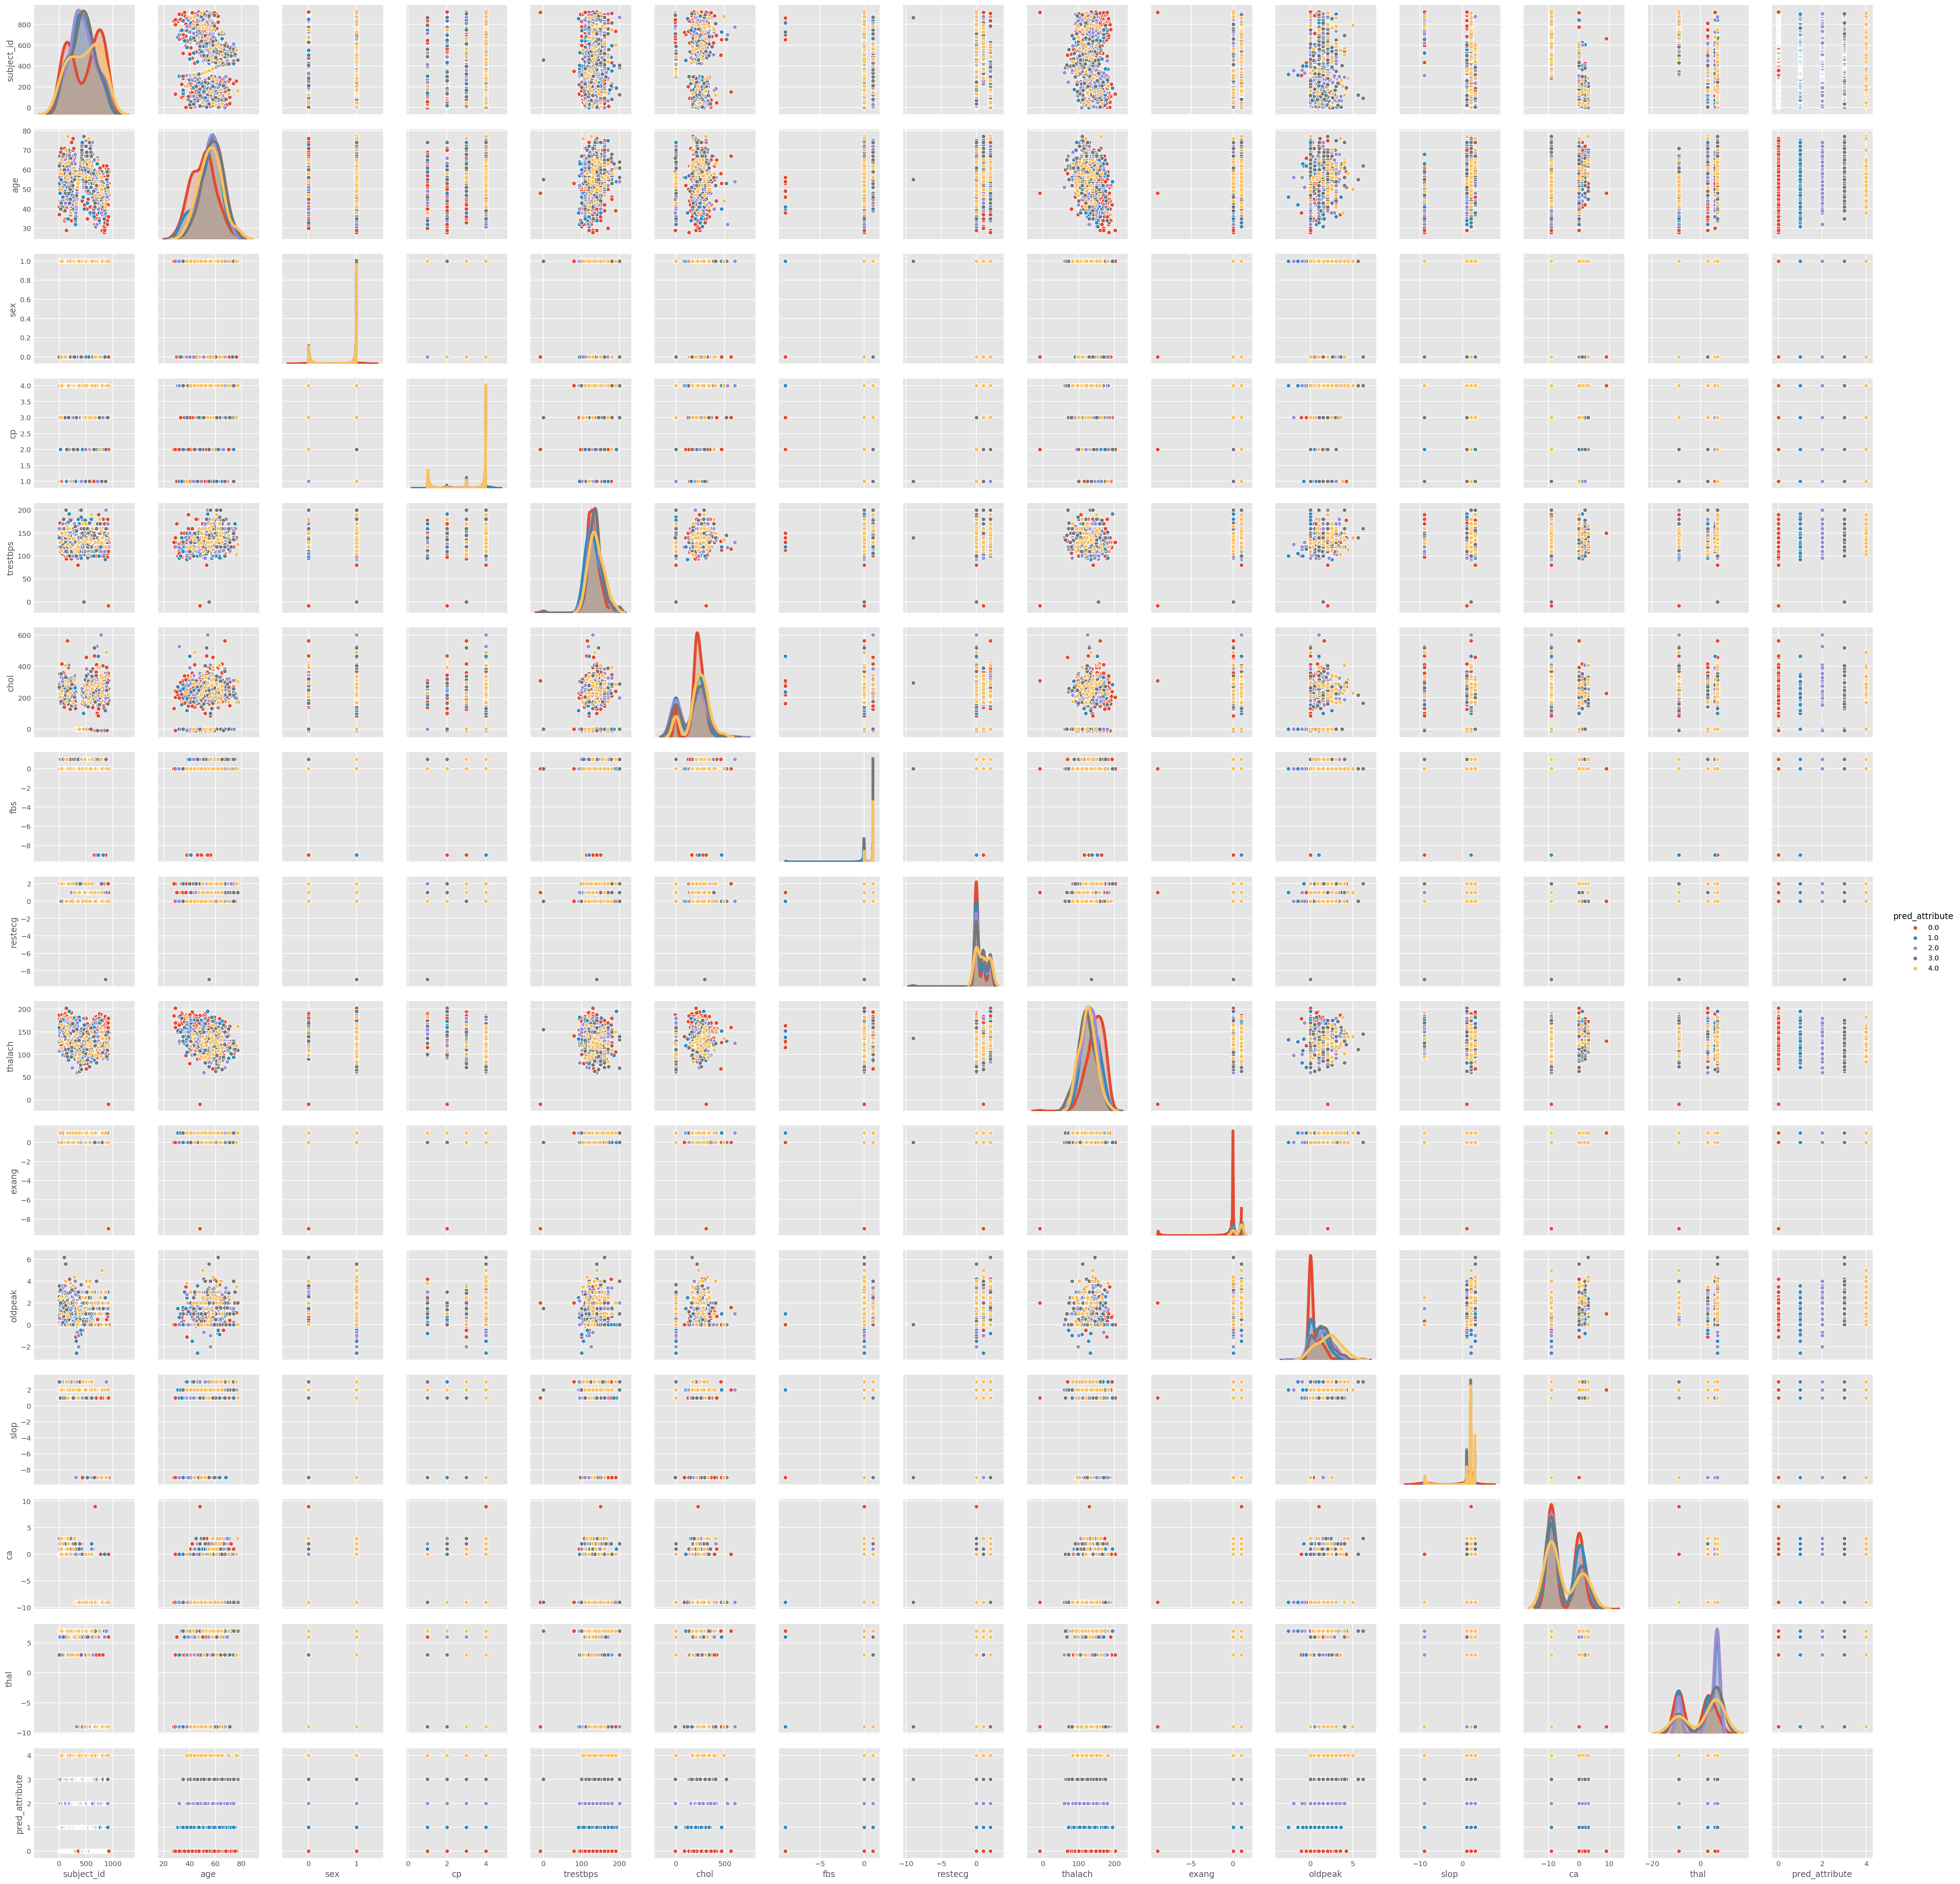

In [161]:
sns.pairplot(df, hue='pred_attribute');

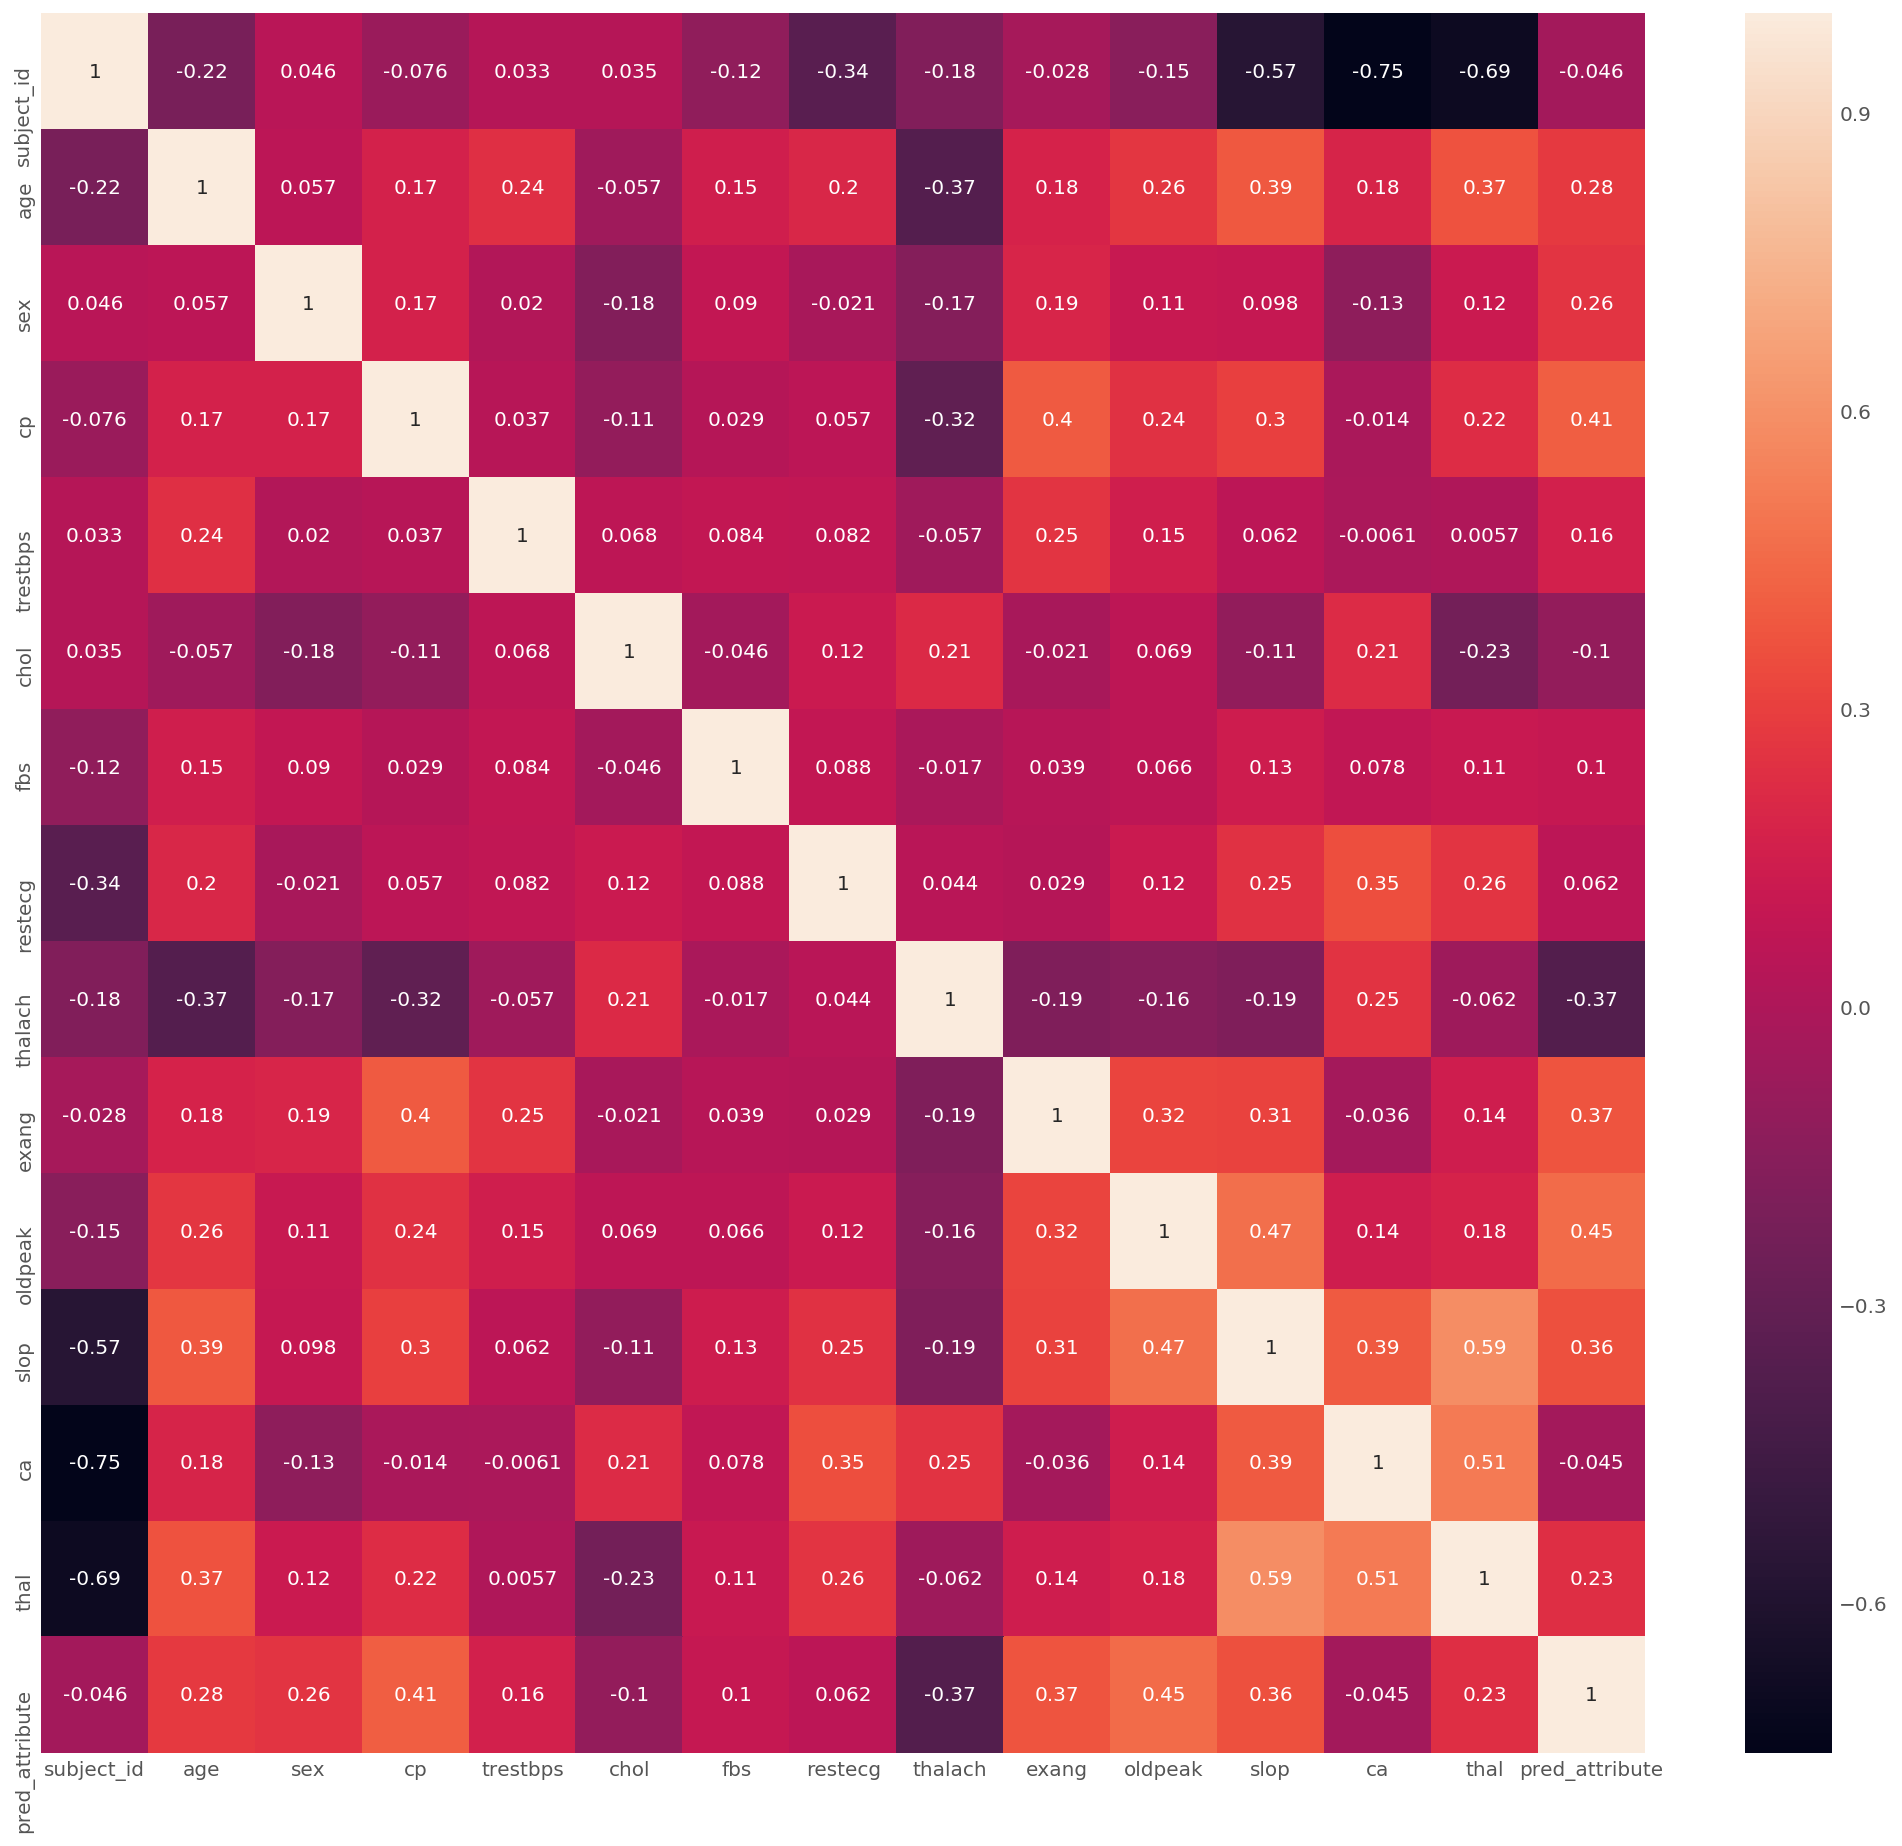

In [162]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

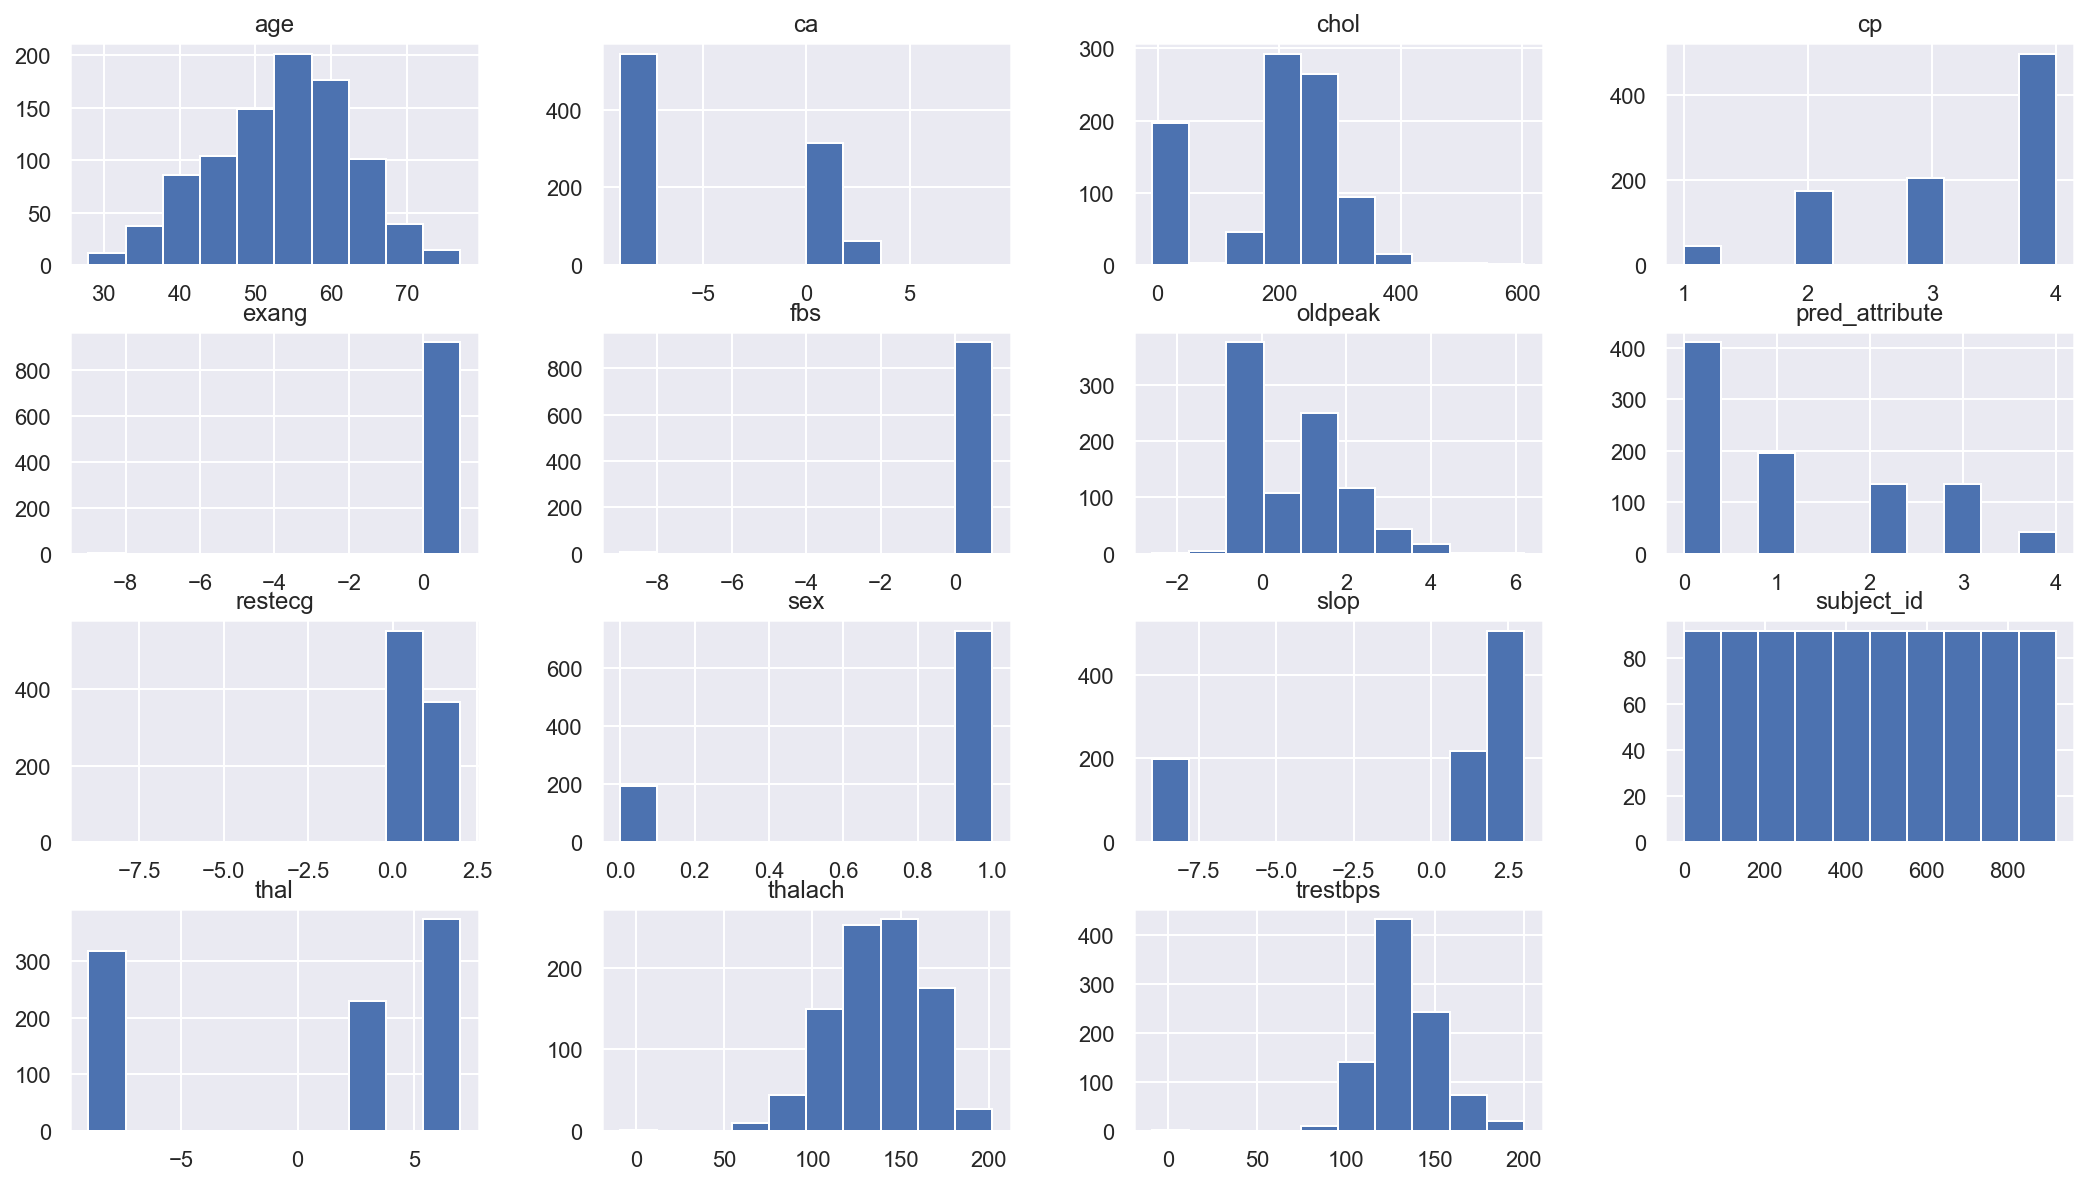

In [163]:
sns.set(rc={'figure.figsize':(16,10)})
df.hist(df.columns);

- In the dataset the subjects are aged mostly around 40-60, and most are male. 

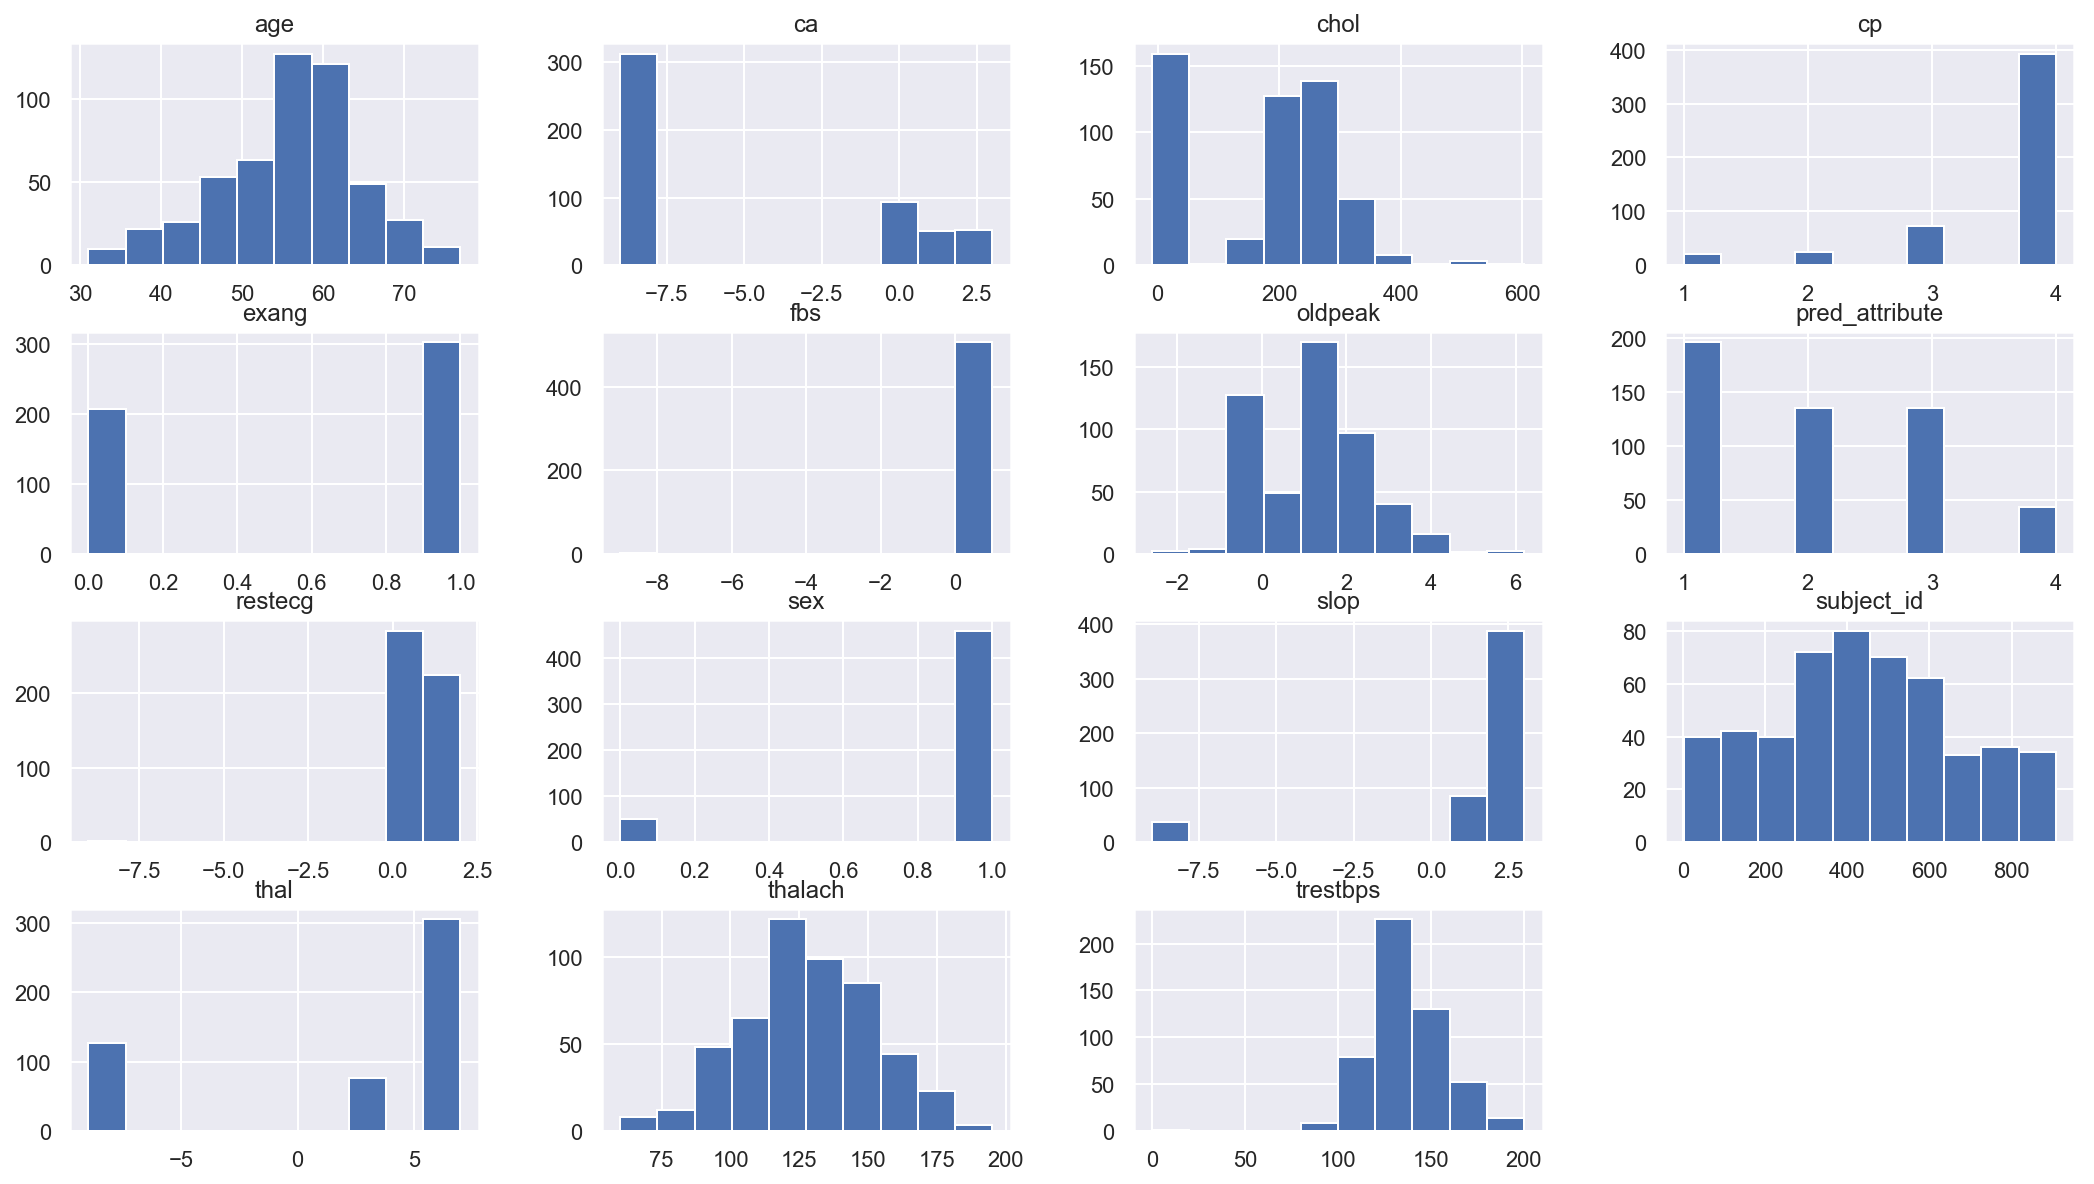

In [164]:
sns.set(rc={'figure.figsize':(16,10)})
df_2 = df[df['pred_attribute']>=1]
df_2.hist(column=df.columns);

- From the graphs above we can see the heat diseased subjects and their approximate heart rates. The subjects are mostly aged around 55-65.

** Continuos Variables **

In [165]:
continuous = df[['age','chol','thalach', 'trestbps', 'oldpeak']]

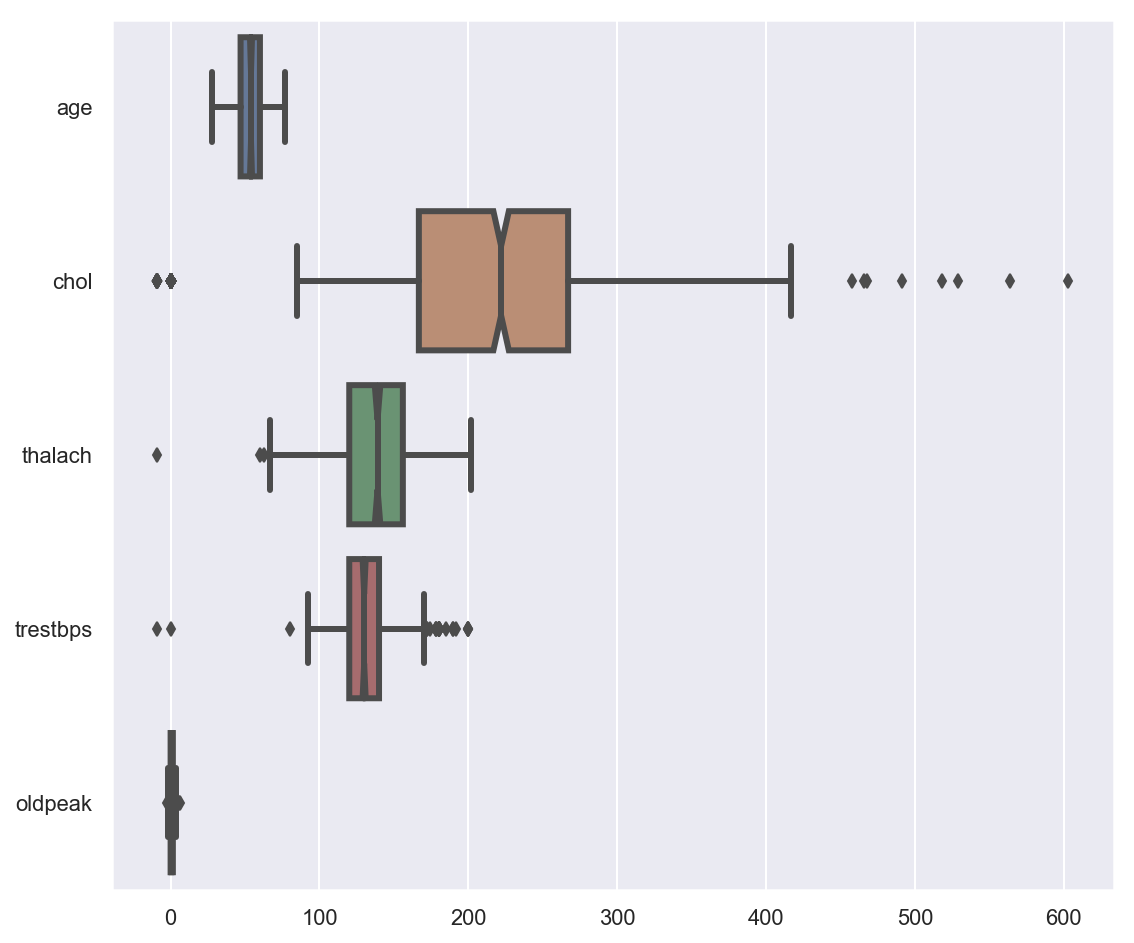

In [166]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

sns.boxplot(data=continuous, orient='h', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

In [167]:
continuous.describe()

age        chol     thalach    trestbps     oldpeak
count  920.000000  920.000000  920.000000  920.000000  920.000000
mean    53.510870  193.793478  136.964351  132.114906    0.890679
std      9.424685  114.211965   25.877566   19.050619    1.060779
min     28.000000   -9.000000   -9.000000   -9.000000   -2.600000
25%     47.000000  166.750000  120.000000  120.000000    0.000000
50%     54.000000  222.000000  139.000000  130.000000    0.600000
75%     60.000000  267.000000  156.000000  140.000000    1.512451
max     77.000000  603.000000  202.000000  200.000000    6.200000

** Categorical **

In [168]:
categorical = df[['sex', 'cp', 'origin', 'restecg', 'exang', 'fbs', 'slop', 'thal', 'ca']]

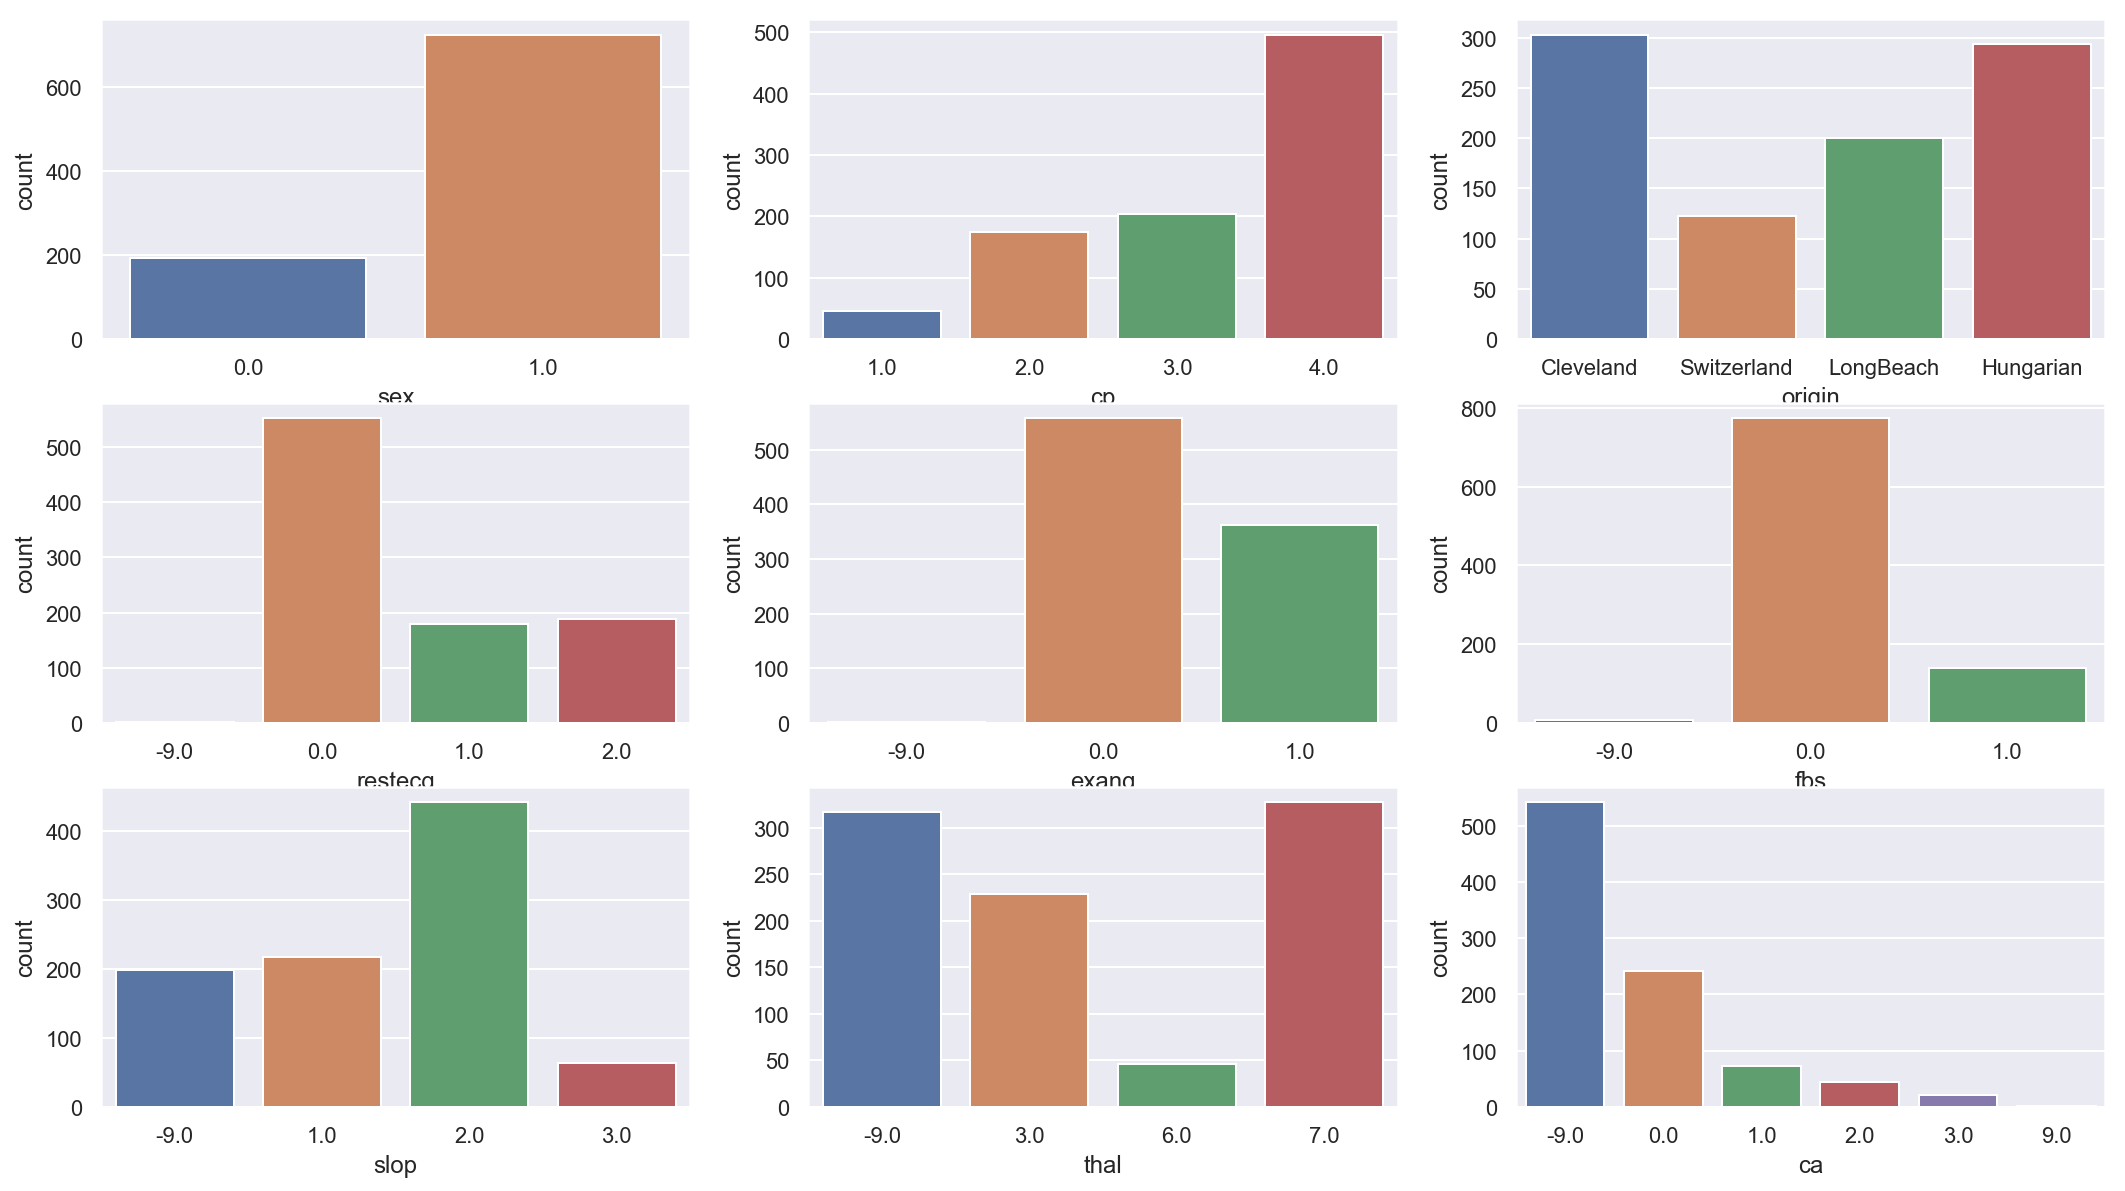

In [169]:
fig, ax =plt.subplots(3,3)
sns.set(rc={'figure.figsize':(16,10)})

sns.countplot(x=categorical.columns[0],data=categorical, ax = ax[0][0])
sns.countplot(x=categorical.columns[1],data=categorical, ax = ax[0][1])
sns.countplot(x=categorical.columns[2],data=categorical, ax = ax[0][2])
sns.countplot(x=categorical.columns[3],data=categorical, ax = ax[1][0])
sns.countplot(x=categorical.columns[4],data=categorical, ax = ax[1][1])
sns.countplot(x=categorical.columns[5],data=categorical, ax = ax[1][2])
sns.countplot(x=categorical.columns[6],data=categorical, ax = ax[2][0])
sns.countplot(x=categorical.columns[7],data=categorical, ax = ax[2][1])
sns.countplot(x=categorical.columns[8],data=categorical, ax = ax[2][2])

fig.show()

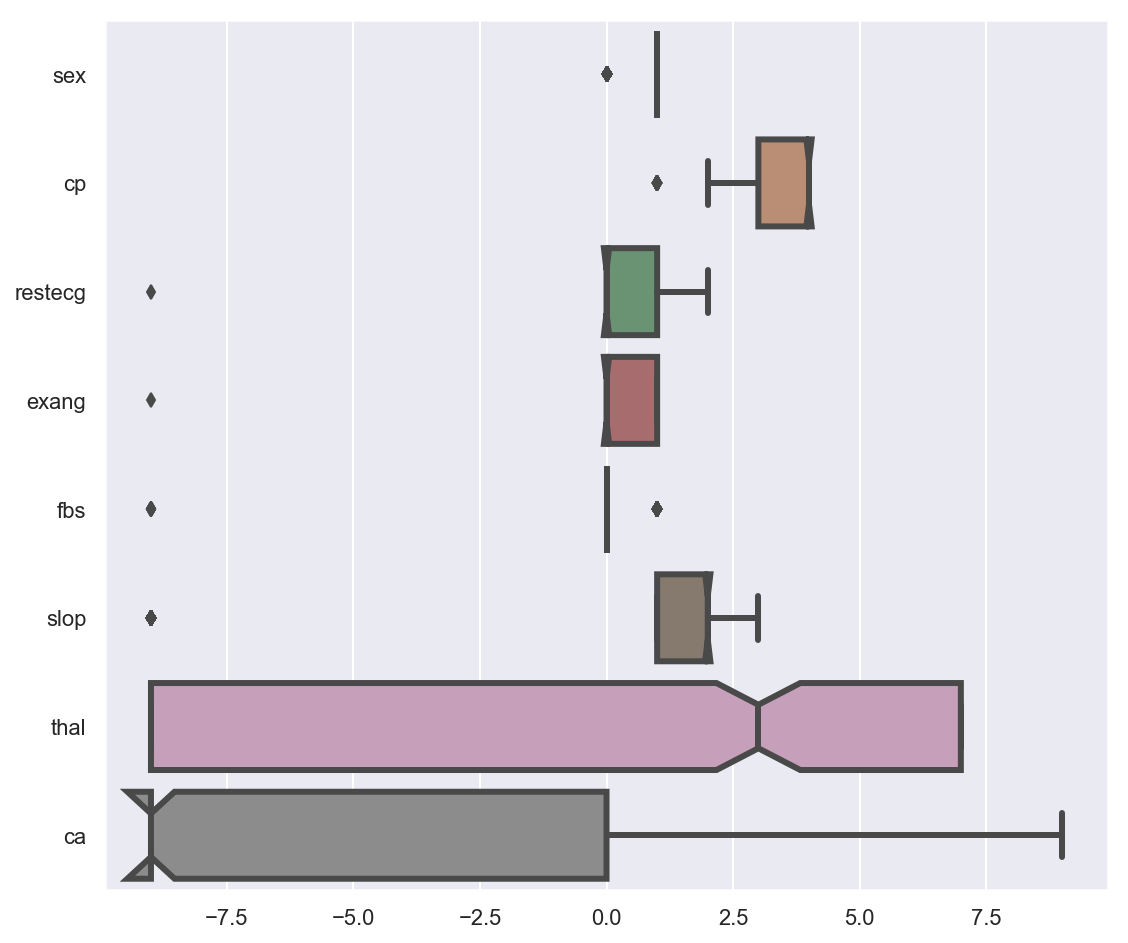

In [170]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

sns.boxplot(data=categorical, orient='h', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

In [171]:
df.pred_attribute.value_counts(normalize=True)

0.0    0.446739
1.0    0.213043
3.0    0.146739
2.0    0.146739
4.0    0.046739
Name: pred_attribute, dtype: float64

# 4. Modelling & Predicting

In this section, I analysed the data by using different models and find the best model which gives the best accuracy score for heart disease prediction. 

Subsections:
1. Defining Values
2. Modelling
3. Improving the Modelling & Accuracy Score
4. Model Selection

** Defining the Values **  
1. Define X & y
    - X: whole the dataset except pred_attributes column
    - y: pred_attributes
        - The predicted values are 0, 1, 2, 3, and 4. I categorised it as 0 and 1, classified them by having a heart disease (1), or healthy (0). I replaced 2, 3, 4 to 1. 
2. Standardize the X
3. Train&Test split
4. Try different modelling
    - Use classification model & confusion matrix
    - Compare the accuracy score for each model
5. Find the best model to predict heart disease


** Modelling ** 
1. Logistic Regression
2. Grid Search
3. Use models and print the accuracy score for each model
    - Compare the Cross Validation, Train, Test scores


** Improving the Modelling & Accuracy Score **

1. Finding the most related columns
    - Check the correlation 
    - Check the best features of models from grid search
        - choose the best columns 
2. Do the modelling for the best columns
    - Compare the new accuracy scores


** Model Selection ** 
1. Choose the best 3-5 models and continue analysis
    * Change the parameters by using GirdSearch and see the improvement
    * Pick the best model 

At the end I compared the scores and suggested the best model to predict heart disease. 

### Defining the Values

** Defining the X & y Values ** 

In [172]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
X.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slop   ca  thal     origin  
0   3.0  0.0   6.0  Cleveland  
1   2.0  3.0   3.0  Cleveland  
2   2.0  2.0   7.0  Cleveland  
3   3.0  0.0   3.0  Cleveland  
4   1.0  0.0   3.0  Cleveland

In [173]:
y = df[['pred_attribute']]

In [174]:
y.pred_attribute.value_counts()

0.0    411
1.0    196
3.0    135
2.0    135
4.0     43
Name: pred_attribute, dtype: int64

** Modifying the y value ** 

In [175]:
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)

In [176]:
y.pred_attribute.value_counts()

1.0    509
0.0    411
Name: pred_attribute, dtype: int64

** Get Dummies for Categorical Values & Standardizing the X ** 

In [177]:
X_dum = pd.get_dummies(X, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                       drop_first=True)

In [178]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns=X_dum.columns)
Xs.head()

age  trestbps      chol   thalach   oldpeak   sex_1.0    cp_2.0  \
0  1.007386  0.676729  0.343465  0.504017  1.329295  0.516931 -0.482953   
1  1.432034  1.464533  0.807767 -1.119893  0.574722  0.516931 -0.482953   
2  1.432034 -0.636278  0.308424 -0.307938  1.612260  0.516931 -0.482953   
3 -1.752828 -0.111075  0.492392  1.934605  2.461155  0.516931 -0.482953   
4 -1.328180 -0.111075  0.089413  1.354637  0.480400 -1.934494  2.070593   

     cp_3.0    cp_4.0   fbs_0.0         ...            ca_1.0    ca_2.0  \
0 -0.533775 -1.081578 -2.293143         ...         -0.291386 -0.221429   
1 -0.533775  0.924575  0.436083         ...         -0.291386 -0.221429   
2 -0.533775  0.924575  0.436083         ...         -0.291386  4.516121   
3  1.873447 -1.081578  0.436083         ...         -0.291386 -0.221429   
4 -0.533775 -1.081578  0.436083         ...         -0.291386 -0.221429   

     ca_3.0    ca_9.0  thal_3.0  thal_6.0  thal_7.0  origin_Hungarian  \
0 -0.149071 -0.032987 -0.575677  4.358899 -0.744348         -0.685309   
1  6.708204 -0.032987  1.737086 -0.229416 -0.744348         -0.685309   
2 -0.149071 -0.032987 -0.575677 -0.229416  1.343457         -0.685309   
3 -0.149071 -0.032987  1.737086 -0.229416 -0.744348         -0.685309   
4 -0.149071 -0.032987  1.737086 -0.229416 -0.744348         -0.685309   

   origin_LongBeach  origin_Switzerland  
0         -0.527046           -0.392847  
1         -0.527046           -0.392847  
2         -0.527046           -0.392847  
3         -0.527046           -0.392847  
4         -0.527046           -0.392847  

[5 rows x 30 columns]

** Finding the Baseline ** 

In [179]:
y.pred_attribute.value_counts(normalize=True)
print('Baseline:')
print(y.pred_attribute.value_counts(normalize=True))

Baseline:
1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Train-Test Split ** 

In [180]:
y = y.pred_attribute

In [181]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3,random_state=random_state)

In [182]:
freqs = pd.DataFrame({'Training': [y_train.sum(),y_train.shape[0] - y_train.sum()],
                      'Test':[y_test.sum(), y_test.shape[0] - y_test.sum()]}, index=['Healthy', 'Sick'])
freqs['Total'] = freqs.Training + freqs.Test
freqs

Training   Test  Total
Healthy     354.0  155.0  509.0
Sick        290.0  121.0  411.0

### Modelling

1. Define the models
2. Cross Validate on test data 
    - get CV score for train
3. Fit the model 
    - Check the train & test scores
    - Accuracy Scores

In [183]:
def grid_search_func_tt(model, params, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                        scoring='r2',cv=5):
    gs = GridSearchCV(
        estimator=model,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv,
        iid=False)

    gs.fit(X_train, y_train)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))


    return gs

In [184]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')


The function above is showing the train & test score of not fitted cross validated model and fitted without cross validated model.

- We are expecting to have higher training score when we fit the model. But at the end the train & test score should be close to each other, which will show us the data is not overfitted. 

** Logistic Regression**

In [185]:
model_lr = LogisticRegression(random_state=random_state)

In [186]:
score_compare(X_train,X_test,y_train,y_test,model_lr)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

CV Test Score: 0.8366883116883116
CV Train Score: 0.8214026162790699
Training Data Accuracy Score: 0.8524844720496895
Test Data Accuracy Score: 0.8369565217391305



- The train & test data accuracy scores are close to each other and higher than the baseline, which shows us the model can do better prediction than the baseline. 

In [187]:
y_pred_lr = model_lr.predict(X_train)

In [188]:
confusion_matrix(y_train,y_pred_lr)

array([[242,  48],
       [ 47, 307]])

- From the confusion matrix above we can see the false negative score. 
- For medical analysis and predictions our aim is to have the lowest false negative, because we don't want to diagnose an unhealthy patient as a healthy patient. 
- Here the false negative score is 48/644 = 0.07 

In [189]:
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       290
         1.0       0.86      0.87      0.87       354

   micro avg       0.85      0.85      0.85       644
   macro avg       0.85      0.85      0.85       644
weighted avg       0.85      0.85      0.85       644



** Checking the Classifier Grid Search and Finding the Best Model **

In [190]:
gs_rfc = grid_search_func_tt(model_rfc, params=params_rfc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_bgc = grid_search_func_tt(model_bgc, params=params_bgc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_dtc = grid_search_func_tt(model_dtc, params=params_dtc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Best score
0.322395060015264

Best estimator
{'bootstrap': 'True', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.4113569714742734
Best score
0.3413113161728995

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'base_estimator__n_jobs': None, 'base_estimator__n_neighbors': 5, 'base_estimator__p': 2, 'base_estimator__weights': 'uniform', 'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), 'bootstrap': 'True', 'bootstra

In [191]:
score_compare(X_train,X_test,y_train,y_test,gs_dtc.best_estimator_)

Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

CV Test Score: 0.7568831168831169
CV Train Score: 0.7654312015503876
Training Data Accuracy Score: 0.7701863354037267
Test Data Accuracy Score: 0.7898550724637681



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

In [192]:
score_compare(X_train,X_test,y_train,y_test,gs_rfc.best_estimator_)

Model: RandomForestClassifier(bootstrap='True', class_weight=None,
            criterion='entropy', max_depth=5, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

CV Test Score: 0.8621428571428572
CV Train Score: 0.8198764534883722
Training Data Accuracy Score: 0.8555900621118012
Test Data Accuracy Score: 0.8514492753623188



- The test & train accuracy scores are again close to each other, so there isnt any overfitting on the data.
- CV scores are not as close as dtc model. 

In [193]:
score_compare(X_train,X_test,y_train,y_test,gs_bgc.best_estimator_)

Model: BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap='True', bootstrap_features=False, max_features=5,
         max_samples=0.9, n_estimators=70, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

CV Test Score: 0.843961038961039
CV Train Score: 0.8167756782945738
Training Data Accuracy Score: 0.889751552795031
Test Data Accuracy Score: 0.8623188405797102



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

- The best model can be bgc or dtc, below by checking the accuracy scores, I choose the best model from the grid search

In [194]:
y_pred_class = gs_dtc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.7701863354037267


In [195]:
y_pred_class = gs_rfc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.8555900621118012


In [196]:
y_pred_class = gs_bgc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.889751552795031


- From the accuracy scores for each model, the highest score is from **gs_bgc** model. Next I am continuing analysing the confusion matrix on this model.

In [197]:
y_pred_rfc = gs_bgc.best_estimator_.predict(X_train)

In [198]:
print(confusion_matrix(y_train,y_pred_rfc))

[[248  42]
 [ 29 325]]


In [199]:
42/644

0.06521739130434782

- By using Grid Search and finding the best model our false positive rate has decreased to 42/644 = 0.06. Which shows that using Grid Search method with different models & parameters will increase our probability of correct predictions.  

In [200]:
print(classification_report(y_train, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.87       290
         1.0       0.89      0.92      0.90       354

   micro avg       0.89      0.89      0.89       644
   macro avg       0.89      0.89      0.89       644
weighted avg       0.89      0.89      0.89       644



** Trying Other Models & Comparing the Accuracy Scores **

In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import decomposition, preprocessing, svm
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier

In [202]:
models_names = ["k-Nearest Neighbors","Support Vector Machine","Linear SVM","RBF SVM","Gaussian Process",
                "Decision Tree","Extra Trees","Random Forest","Gradient Boost","AdaBoost","Gaussian Naive Bayes",
                "LDA","QDA","Logistic Regression","SGD Classifier","Multilayer Perceptron","Voting Classifier", 
                "Bagging Classifier"]

models = [KNeighborsClassifier(n_neighbors=3),
          SVC(random_state=random_state),
          SVC(kernel="linear",random_state=random_state),
          SVC(kernel="rbf",random_state=random_state),
          GaussianProcessClassifier(),
          DecisionTreeClassifier(random_state=random_state),
          ExtraTreesClassifier(random_state=random_state),
          RandomForestClassifier(random_state=random_state),
          GradientBoostingClassifier(random_state=random_state),
          AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,learning_rate=0.1,
                             random_state=random_state),
          GaussianNB(),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          LogisticRegression(random_state=random_state),
          SGDClassifier(),               
          MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
          VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), 
                                       ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard'),
          BaggingClassifier(KNeighborsClassifier(),random_state=random_state)]

          

classifiers = {"k-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=3),
               "Support Vector Machine" :  SVC(random_state=random_state),
               "Linear SVM" :  SVC(kernel="linear",random_state=random_state),
               "RBF SVM" :  SVC(kernel="rbf",random_state=random_state),
               "Gaussian Process" : GaussianProcessClassifier(),
               "Decision Tree" : DecisionTreeClassifier(random_state=random_state),
               "Extra Trees" : ExtraTreesClassifier(random_state=random_state),
               "Random Forest" : RandomForestClassifier(random_state=random_state),
               "Gradient Boost" : GradientBoostingClassifier(random_state=random_state),
               "AdaBoost" : AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                               n_estimators=10,random_state=random_state,learning_rate=0.1),
               "Gaussian Naive Bayes" : GaussianNB(),
               "LDA" : LinearDiscriminantAnalysis(),
               "QDA" :  QuadraticDiscriminantAnalysis(),
               "Logistic Regression" : LogisticRegression(random_state=random_state),
               "SGD Classifier" : SGDClassifier(),
               "Multilayer Perceptron" :  MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',
                                                        random_state=random_state),
               "Voting Classifier" : VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)),
                                                                  ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))],
                                                      voting='hard'),
               "Bagging Classifier" : BaggingClassifier(KNeighborsClassifier(),random_state=random_state)}

In [203]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')

In [204]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('Train-Test Difference', ascending=False)

CV Train Score  CV Test Score  \
AdaBoost                      0.735986       0.800779   
Decision Tree                 0.742224       0.793701   
Extra Trees                   0.788784       0.869416   
Random Forest                 0.801260       0.840455   
Gaussian Process              0.773268       0.815130   
Voting Classifier             0.816751       0.833117   
Gradient Boost                0.799661       0.855000   
RBF SVM                       0.819852       0.840519   
Support Vector Machine        0.819852       0.840519   
Linear SVM                    0.810538       0.829545   
k-Nearest Neighbors           0.802786       0.836948   
LDA                           0.829215       0.833052   
Bagging Classifier            0.822965       0.844156   
QDA                           0.725109       0.655649   
Logistic Regression           0.821403       0.836688   
SGD Classifier                0.781056       0.829610   
Multilayer Perceptron         0.815189       0.862143   
Gaussian Naive Bayes          0.779542       0.651818   

                        Training Data Accuracy Score  \
AdaBoost                                    1.000000   
Decision Tree                               1.000000   
Extra Trees                                 1.000000   
Random Forest                               0.987578   
Gaussian Process                            0.986025   
Voting Classifier                           0.956522   
Gradient Boost                              0.927019   
RBF SVM                                     0.905280   
Support Vector Machine                      0.905280   
Linear SVM                                  0.855590   
k-Nearest Neighbors                         0.875776   
LDA                                         0.854037   
Bagging Classifier                          0.868012   
QDA                                         0.827640   
Logistic Regression                         0.852484   
SGD Classifier                              0.753106   
Multilayer Perceptron                       0.846273   
Gaussian Naive Bayes                        0.770186   

                        Testing Data Accuracy Score  Train-Test Difference  
AdaBoost                                   0.750000               0.250000  
Decision Tree                              0.764493               0.235507  
Extra Trees                                0.793478               0.206522  
Random Forest                              0.804348               0.183230  
Gaussian Process                           0.829710               0.156315  
Voting Classifier                          0.833333               0.123188  
Gradient Boost                             0.829710               0.097308  
RBF SVM                                    0.862319               0.042961  
Support Vector Machine                     0.862319               0.042961  
Linear SVM                                 0.826087               0.029503  
k-Nearest Neighbors                        0.847826               0.027950  
LDA                                        0.833333               0.020704  
Bagging Classifier                         0.847826               0.020186  
QDA                                        0.807971               0.019669  
Logistic Regression                        0.836957               0.015528  
SGD Classifier                             0.764493              -0.011387  
Multilayer Perceptron                      0.862319              -0.016046  
Gaussian Naive Bayes                       0.818841              -0.048654

- Above I ran many different models to see the prediction and the score differences between different models. Here the scores are showing us if the model is training the data well. If it does then the test scores will be close to the training score. If not the test and train scores will have a big difference.  
- ADA Boost, Decision Tree and Extra Trees Classifier models give us 100% accuracy score on the train data. But their test data is approximately 75%. 
- Overall the training scores are very high as we expected, and most of the test data is close to the train data. The most difference between these scores are in GaussianProcessClassifier and RandomForestClassifier, which shows us there is overfitting on the data for those models.

In [205]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df = pd.DataFrame(df_copy, index=models_names)   
models_df.columns=['AccuracyScore']
models_df.sort_values('AccuracyScore',ascending=False)

AccuracyScore
Support Vector Machine       0.862319
Multilayer Perceptron        0.862319
RBF SVM                      0.862319
k-Nearest Neighbors          0.847826
Bagging Classifier           0.847826
Logistic Regression          0.836957
LDA                          0.833333
Gradient Boost               0.829710
Gaussian Process             0.829710
Linear SVM                   0.826087
Gaussian Naive Bayes         0.818841
Voting Classifier            0.818841
QDA                          0.807971
Random Forest                0.804348
Extra Trees                  0.793478
Decision Tree                0.764493
AdaBoost                     0.750000
SGD Classifier               0.721014

- From the modelling above the best models that are giving the best prediction are ** Support Vector Machine, Multilayer Perceptron, RBF SVM, , k-Nearest Neighbors, Bagging Classifier, Logistic Regression**

### Imporving the Modelling & Accuracy Score

** How to Have a Better Prediction & Increase the Accuracy Score **

1. Check the correlation
    - See the relationship between the pred_attribute and other columns 
    - Pick the highest 5 scores, which are the most related columns to our prediction. 
2. Do the modelling in GridSearch
    - Check the feature importance and pick the highest 5 scores. Again, this will give us the most related five columns to our prediction. 
3. Model the new data frame with most related features & compare the scores

** Finding the Most Related Columns ** 

In [206]:
df_update = df.copy()
df_update['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
df_update.head()

subject_id   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0         0.0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1         1.0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2         2.0  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3         3.0  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4         4.0  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slop   ca  thal  pred_attribute     origin  
0      2.3   3.0  0.0   6.0             0.0  Cleveland  
1      1.5   2.0  3.0   3.0             1.0  Cleveland  
2      2.6   2.0  2.0   7.0             1.0  Cleveland  
3      3.5   3.0  0.0   3.0             0.0  Cleveland  
4      1.4   1.0  0.0   3.0             0.0  Cleveland

In [207]:
df_update.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

pred_attribute
pred_attribute        1.000000
cp                    0.471712
slop                  0.415499
exang                 0.403471
oldpeak               0.378678
sex                   0.307284
thal                  0.301456
age                   0.282700
trestbps              0.110004
fbs                   0.094688
restecg               0.047835
ca                   -0.026526
subject_id           -0.084591
chol                 -0.188064
thalach              -0.374274

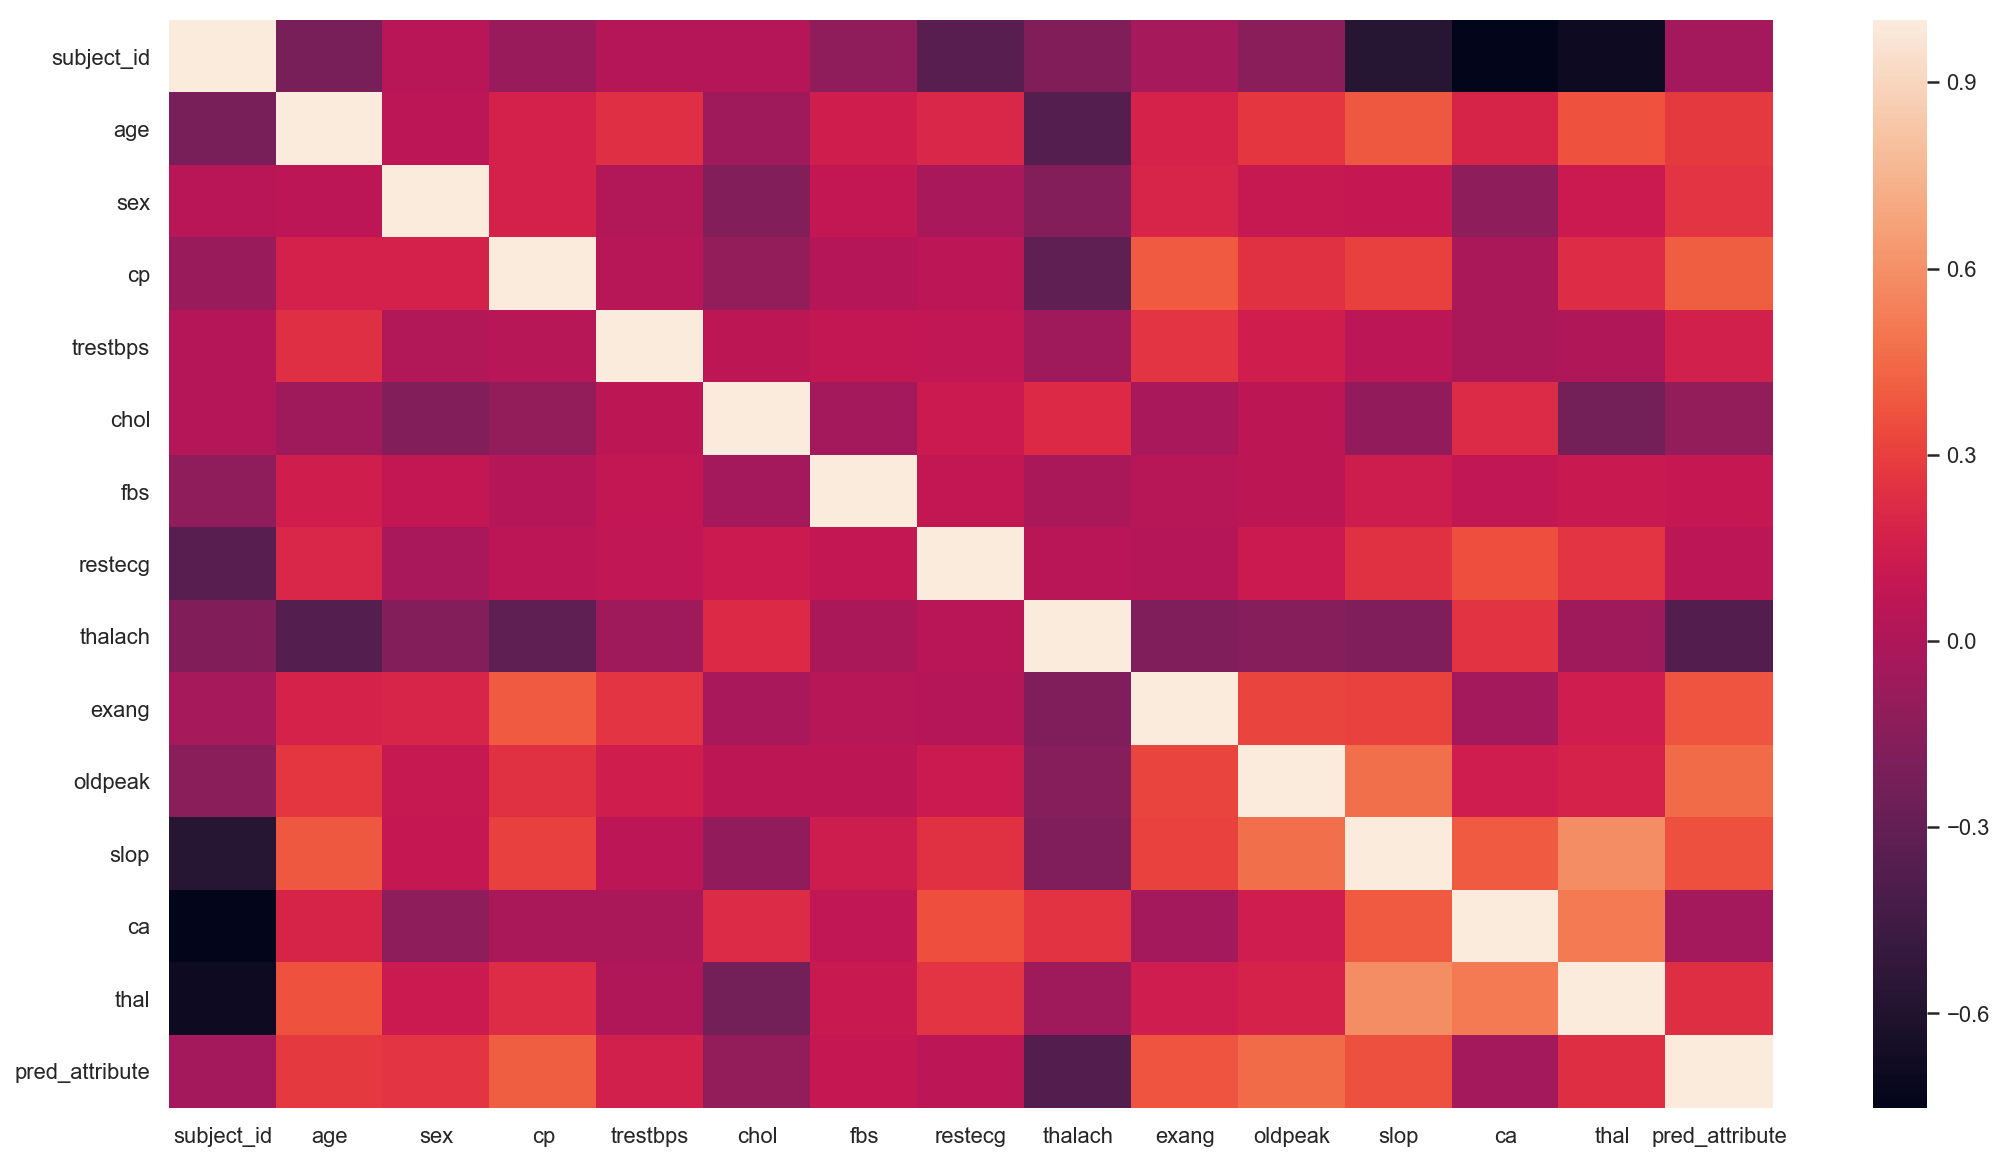

In [208]:
sns.heatmap(df.corr());

- The graph above shows us the relationship between each model. Where we can see there isn't any high correlation between variables. The best correlated values with pred_attribute are **olpeak, cp, exang, slop, thalach(negative relationship)**. 

In [209]:
gs_rfc.best_estimator_.fit(Xs, y)
importance_rfc = pd.Series(gs_rfc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('RFC:',importance_rfc)

RFC: cp_4.0                0.121921
exang_1.0             0.110971
thal_7.0              0.085220
thalach               0.075181
oldpeak               0.074692
exang_0.0             0.073264
slop_2.0              0.066542
cp_2.0                0.065745
origin_Switzerland    0.045461
age                   0.044805
chol                  0.037431
origin_Hungarian      0.032166
sex_1.0               0.029809
trestbps              0.021918
ca_0.0                0.021672
thal_3.0              0.020410
cp_3.0                0.014839
slop_1.0              0.012597
origin_LongBeach      0.009346
ca_2.0                0.005905
slop_3.0              0.004590
thal_6.0              0.004254
restecg_1.0           0.003985
fbs_1.0               0.003865
restecg_0.0           0.003543
ca_1.0                0.003518
fbs_0.0               0.002707
restecg_2.0           0.002249
ca_3.0                0.001393
ca_9.0                0.000000
dtype: float64


- By checking the feature importance for rfc; **cp, exang, thal, thalach, oldpeak, slop** are the most related columns.

In [210]:
gs_dtc.best_estimator_.fit(Xs, y)
importance_dtc = pd.Series(gs_dtc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('DTC:',importance_dtc)

DTC: slop_2.0              0.350932
cp_2.0                0.235222
cp_4.0                0.182538
ca_0.0                0.101377
thal_3.0              0.039951
chol                  0.029786
age                   0.020672
oldpeak               0.018816
thal_7.0              0.016302
trestbps              0.004405
fbs_1.0               0.000000
fbs_0.0               0.000000
sex_1.0               0.000000
cp_3.0                0.000000
restecg_1.0           0.000000
thalach               0.000000
restecg_0.0           0.000000
origin_Switzerland    0.000000
restecg_2.0           0.000000
origin_LongBeach      0.000000
exang_1.0             0.000000
slop_1.0              0.000000
slop_3.0              0.000000
ca_1.0                0.000000
ca_2.0                0.000000
ca_3.0                0.000000
ca_9.0                0.000000
thal_6.0              0.000000
origin_Hungarian      0.000000
exang_0.0             0.000000
dtype: float64


- By checking the feature importance for Decision Tree Calssifier model; **slop, cp, ca, thal, chol, oldpeak** are the most related columns.

- Above I compared the features for each best model from grid search and checked the relationship by looking at the correlation. The higher importance score shows the higher relationship between the pred_attribute and the column. As a result, **oldpeak, exang, slop, cp, thalach, chol** values are the ones that are most related to y (pred_attribute). Next step I am using these columns as my X value to predict the heart disease.  



** Modelling with Most Related Columns ** 

** Defining X & y **

In [211]:
related_df = df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol', 'pred_attribute']]
X = related_df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol']]
y = related_df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#Dummy the categorical values
X_dum = pd.get_dummies(X, columns = ['exang','slop','cp'], drop_first=True)

#Standardize the X
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns = X_dum.columns)

#Train&Test Split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=random_state)

** Comparing the CV & Fitted Train/Test Scores **

In [212]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('Train-Test Difference', ascending=False)

CV Train Score  CV Test Score  \
Decision Tree                 0.703428       0.768052   
AdaBoost                      0.704966       0.749935   
Extra Trees                   0.737609       0.782597   
Random Forest                 0.750000       0.782662   
Gradient Boost                0.757776       0.779026   
Gaussian Process              0.767091       0.811558   
k-Nearest Neighbors           0.753125       0.836948   
Bagging Classifier            0.764002       0.818766   
Voting Classifier             0.781044       0.837013   
RBF SVM                       0.779469       0.822338   
Support Vector Machine        0.779469       0.822338   
QDA                           0.779469       0.605260   
SGD Classifier                0.636616       0.742727   
Gaussian Naive Bayes          0.781032       0.807987   
Multilayer Perceptron         0.788784       0.829740   
Linear SVM                    0.781008       0.847597   
Logistic Regression           0.791897       0.825974   
LDA                           0.785683       0.822338   

                        Training Data Accuracy Score  \
Decision Tree                               0.998447   
AdaBoost                                    0.998447   
Extra Trees                                 0.998447   
Random Forest                               0.979814   
Gradient Boost                              0.895963   
Gaussian Process                            0.861801   
k-Nearest Neighbors                         0.860248   
Bagging Classifier                          0.829193   
Voting Classifier                           0.841615   
RBF SVM                                     0.810559   
Support Vector Machine                      0.810559   
QDA                                         0.788820   
SGD Classifier                              0.709627   
Gaussian Naive Bayes                        0.779503   
Multilayer Perceptron                       0.787267   
Linear SVM                                  0.793478   
Logistic Regression                         0.791925   
LDA                                         0.791925   

                        Testing Data Accuracy Score  Train-Test Difference  
Decision Tree                              0.706522               0.291925  
AdaBoost                                   0.728261               0.270186  
Extra Trees                                0.757246               0.241201  
Random Forest                              0.760870               0.218944  
Gradient Boost                             0.811594               0.084369  
Gaussian Process                           0.793478               0.068323  
k-Nearest Neighbors                        0.793478               0.066770  
Bagging Classifier                         0.775362               0.053830  
Voting Classifier                          0.826087               0.015528  
RBF SVM                                    0.797101               0.013458  
Support Vector Machine                     0.797101               0.013458  
QDA                                        0.789855              -0.001035  
SGD Classifier                             0.713768              -0.004141  
Gaussian Naive Bayes                       0.793478              -0.013975  
Multilayer Perceptron                      0.804348              -0.017081  
Linear SVM                                 0.811594              -0.018116  
Logistic Regression                        0.811594              -0.019669  
LDA                                        0.822464              -0.030538

**Comparing the Accuracy Scores**

In [213]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df2 = pd.DataFrame(df_copy, index=models_names)  
models_df2.columns = ['NewAccuracyScore']  

models_df2 = models_df2.merge(models_df, left_index=True, right_index=True, how='left')
models_df2['Difference'] = models_df2['NewAccuracyScore'] - models_df2['AccuracyScore']
models_df2.sort_values('NewAccuracyScore',ascending=False)

NewAccuracyScore  AccuracyScore  Difference
LDA                             0.822464       0.833333   -0.010870
Voting Classifier               0.818841       0.818841    0.000000
Linear SVM                      0.811594       0.826087   -0.014493
Logistic Regression             0.811594       0.836957   -0.025362
Gradient Boost                  0.811594       0.829710   -0.018116
Multilayer Perceptron           0.804348       0.862319   -0.057971
RBF SVM                         0.797101       0.862319   -0.065217
Support Vector Machine          0.797101       0.862319   -0.065217
k-Nearest Neighbors             0.793478       0.847826   -0.054348
Gaussian Process                0.793478       0.829710   -0.036232
Gaussian Naive Bayes            0.793478       0.818841   -0.025362
QDA                             0.789855       0.807971   -0.018116
Bagging Classifier              0.775362       0.847826   -0.072464
Random Forest                   0.760870       0.804348   -0.043478
SGD Classifier                  0.757246       0.721014    0.036232
Extra Trees                     0.757246       0.793478   -0.036232
AdaBoost                        0.728261       0.750000   -0.021739
Decision Tree                   0.706522       0.764493   -0.057971

Data Frame above shows us the accuracy differences. As we can see most of the scores have been decreased. While each different model has its own method where it takes different columns and predict accordingly. 
- The correlation between columns are not very high, thus when we choose the most related columns the scores don't change that much, mostly they decrease. While each model give different importance to each feature, every feature is affecting the disease prediction. Thus, I am proceeding my analysis by having all the columns to predict the disease. 

While the accuracy scores have been decreased, I chose the best model by checking the old scores where I used every column. 

Next step I did grid search on the best models with highest score, to see if I can increase the accuracy by changing the parameters in the best models. The best models are:  
- Support Vector Machine 0.862
- Multilayer Perceptron 0.862
- RBF SVM 0.862
- k-Nearest Neighbors 0.847
- Bagging Classifier 0.847
- Logistic Regression 0.836
- Voting Classifier 0.818
    - While there was no difference between the scores, I wanted to add Voting Classifier model to see if the score will change and improve by using GridSearch. 

### Model Selection

Choose the best 6 models and continue analysis
- Change the parameters and see the changes
- Pick the best model 

From the analysis of previous section, I picked **Support Vector Machine, Multilayer Perceptron, RBF SVM, k-Nearest Neighbors, Bagging Classifier, Logistic Regression, Voting Classifier** models as my best models. In this section I am trying to improve these best models by changing their parameter using Grid Search. At the end I will compare my accuracy scores with the previous one's and pick my best model. 

- Support Vector Machine and RBF SVM are going to be in the same Grid Search model, while they are both Support Vector Machine with different kernels. Grid Search will run the model for both kernels and give us the best model.

** Define Values **

In [215]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
y = df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

Baseline: 1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Grid Search Function **

** Models **

In [216]:
#Best Models
model_SVC = SVC(kernel="linear",random_state=random_state, probability=True)
model_MLP = MLPClassifier(hidden_layer_sizes=(100,), momentum=0.9, random_state=random_state)
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_BGC = BaggingClassifier(KNeighborsClassifier(),random_state=random_state)
model_LR = LogisticRegression(random_state=random_state)
model_VC = VotingClassifier(estimators=[('lr', LogisticRegression()), ('SVM',SVC(C=1000, probability=True)), 
                                        ('rf',RandomForestClassifier()), ('gnb', GaussianNB()),
                                        ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting = 'soft')


** Parameters for GridSearch **

In [219]:
params_SVC = {'kernel' : ['linear','rbf','poly','sigmoid'] , 'gamma' : [1e-1, 1e-2, 1e-3, 1e-4],
              'C': [1, 10, 100, 1000] }

params_MLP = {'solver': ['sgd','lbfgs'], 'max_iter': np.arange(1000,2000,100), 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 28)}

params_KNN = {'n_neighbors':[3,4,5,6,7,8,9,10], 'leaf_size':[1,2,3,5], 'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'], 'n_jobs':[-1]}

params_BGC = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X_train.shape[1]), X_train.shape[1]+1), 'bootstrap': ['True','False']}

params_LR = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

params_VC = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200] }

In [221]:
#Grid Search
gs_SVC = grid_search_func_tt(model_SVC, params_SVC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_MLP = grid_search_func_tt(model_MLP, params_MLP, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_KNN = grid_search_func_tt(model_KNN, params_KNN, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_BGC = grid_search_func_tt(model_BGC, params_BGC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_LR = grid_search_func_tt(model_LR, params_LR, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_VC = grid_search_func_tt(model_VC, params_VC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)


Best score
0.29737459238187747

Best estimator
{'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test score:  0.4113569714742734
Best score
0.33512662179976416

Best estimator
{'activation': 'relu', 'alpha': 0.01, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Test score:  0.42607304718741656
Best score
0.32247554291264835

Best estimator
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, '

In [269]:
#Comparing the CV, Test & Train Scores
cv_train = []
cv_test = []
train = []
test = []
gs_models =[gs_SVC.best_estimator_,gs_MLP.best_estimator_,gs_KNN.best_estimator_, gs_BGC.best_estimator_,
            gs_LR.best_estimator_, gs_VC.best_estimator_]
for model in gs_models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=['SVC','MLP','KNN','BGC','LR','VC'])   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('CV Train Score', ascending=False)

CV Train Score  CV Test Score  Training Data Accuracy Score  \
MLP        0.835429       0.873052                      0.861801   
BGC        0.835405       0.847662                      0.880435   
KNN        0.832292       0.865844                      1.000000   
SVC        0.826078       0.858506                      0.854037   
VC         0.824503       0.851364                      0.931677   
LR         0.822965       0.847532                      0.846273   

     Testing Data Accuracy Score  Train-Test Difference  
MLP                     0.858696               0.003106  
BGC                     0.840580               0.039855  
KNN                     0.862319               0.137681  
SVC                     0.855072              -0.001035  
VC                      0.855072               0.076605  
LR                      0.840580               0.005694

- Here I used Grid Search to analyse different parameters for each model. 
- Score_Compare function shows the difference between train and test scores. Here the train & test scores are close to each other, which shows us there isn't overfitting at the dataset, and the model is training the data well while the test scores are close to the train scores. 
- When we check the CV_Train scores it will give us the correct prediction accuracy scores on a not overfitted, regularized dataset. As a result our best model will be the **MLP Model** (Neural Network Model).


** Confusion Matrix & ROC, AUC, Precision, Recall Scores **

In [229]:
from sklearn.metrics import auc, precision_score, recall_score

**SVC**

In [230]:
print(confusion_matrix(y_train, y_pred_class_SVC))

[[242  48]
 [ 46 308]]


In [270]:
#False Positive Rate
48/644

0.07453416149068323

In [232]:
prob_SVC = pd.DataFrame(gs_SVC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [233]:
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_train, prob_SVC.class_1)

**MLP**

In [234]:
print(confusion_matrix(y_train, y_pred_class_MLP))

[[243  47]
 [ 42 312]]


In [271]:
#False Positive Rate
47/644

0.07298136645962733

In [236]:
prob_MLP = pd.DataFrame(gs_MLP.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [237]:
fpr_MLP, tpr_MLP, threshold_MLP = roc_curve(y_train, prob_MLP.class_1)

**KNN**

In [238]:
print(confusion_matrix(y_train, y_pred_class_KNN))

[[290   0]
 [  0 354]]


In [272]:
#False Positive Rate
0/644

0.0

In [240]:
prob_KNN = pd.DataFrame(gs_KNN.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [241]:
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_train, prob_KNN.class_1)

**BGC**

In [242]:
print(confusion_matrix(y_train, y_pred_class_BGC))

[[255  35]
 [ 42 312]]


In [273]:
#False Positive Rate
35/644

0.05434782608695652

In [244]:
prob_BGC = pd.DataFrame(gs_BGC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [245]:
fpr_BGC, tpr_BGC, threshold_BGC = roc_curve(y_train, prob_BGC.class_1)

**LR**

In [246]:
print(confusion_matrix(y_train, y_pred_class_LR))

[[240  50]
 [ 49 305]]


In [274]:
#False Positive Rate
50/644

0.07763975155279502

In [248]:
prob_LR = pd.DataFrame(gs_LR.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [249]:
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_train, prob_LR.class_1)

**VC**

In [250]:
print(confusion_matrix(y_train, y_pred_class_VC))

[[253  37]
 [ 12 342]]


In [275]:
#False Positive Rate
37/644

0.05745341614906832

In [252]:
prob_VC = pd.DataFrame(gs_VC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [253]:
fpr_VC, tpr_VC, threshold_VC = roc_curve(y_train, prob_VC.class_1)

In [277]:
#Data Frame of all the scores for each model
df_scores = pd.DataFrame({'CV Train Score' : [cross_val_score(gs_SVC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_KNN.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_LR.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_VC.best_estimator_, X_train, y_train, cv=5).mean()] ,
                          
                          'AccuracyScore': [metrics.accuracy_score(y_train, y_pred_class_SVC),
                                            metrics.accuracy_score(y_train, y_pred_class_MLP), 
                                            metrics.accuracy_score(y_train, y_pred_class_KNN),
                                            metrics.accuracy_score(y_train, y_pred_class_BGC),
                                            metrics.accuracy_score(y_train, y_pred_class_LR), 
                                            metrics.accuracy_score(y_train, y_pred_class_VC) ],
                          
                          'ROCScore' : [roc_auc_score(y_train,prob_SVC.class_1),
                                        roc_auc_score(y_train,prob_MLP.class_1), 
                                        roc_auc_score(y_train,prob_KNN.class_1), 
                                        roc_auc_score(y_train,prob_BGC.class_1),
                                        roc_auc_score(y_train,prob_LR.class_1),
                                        roc_auc_score(y_train,prob_VC.class_1) ],
                          
                          'AUCScore' : [auc(fpr_SVC,tpr_SVC), auc(fpr_MLP,tpr_MLP), auc(fpr_KNN,tpr_KNN), 
                                        auc(fpr_BGC,tpr_BGC), auc(fpr_LR,tpr_LR), auc(fpr_VC,tpr_VC)
      ],
                          'PrecisionScore' : [precision_score(y_train,y_pred_class_SVC), 
                                              precision_score(y_train,y_pred_class_MLP), 
                                              precision_score(y_train,y_pred_class_KNN), 
                                              precision_score(y_train,y_pred_class_BGC),
                                              precision_score(y_train,y_pred_class_LR),
                                              precision_score(y_train,y_pred_class_VC)
       ], 
                          'RecallScore' : [recall_score(y_train,y_pred_class_SVC),
                                           recall_score(y_train,y_pred_class_MLP),
                                           recall_score(y_train,y_pred_class_KNN),
                                           recall_score(y_train,y_pred_class_BGC),
                                           recall_score(y_train,y_pred_class_LR), 
                                           recall_score(y_train,y_pred_class_VC),
       
      ]}, index = ['SVC','MLP','KNN','BGC','LR','VC'])

df_scores

CV Train Score  AccuracyScore  ROCScore  AUCScore  PrecisionScore  \
SVC        0.826078       0.854037  0.921576  0.921576        0.865169   
MLP        0.835429       0.861801  0.931892  0.931892        0.869081   
KNN        0.832292       1.000000  1.000000  1.000000        1.000000   
BGC        0.835405       0.880435  0.920787  0.920787        0.899135   
LR         0.822965       0.846273  0.917232  0.917232        0.859155   
VC         0.821427       0.923913  0.990220  0.990220        0.902375   

     RecallScore  
SVC     0.870056  
MLP     0.881356  
KNN     1.000000  
BGC     0.881356  
LR      0.861582  
VC      0.966102

- After all the analysis and modelling, the best model is **MLP** with **83%** accuracy score. Next section I used the best model on a different data frame where I dropped the missing values. This is showing me if predicting missing values increase or decrease the prediction accuracy.
- Additionally **MLP** also has the lowest false positive score which is 0.07 (diagnosing the subject as healthy but the subject is diseased).

In [278]:
tp = np.sum((y_train == 1) & (y_pred_class_VC == 1))
fp = np.sum((y_train == 0) & (y_pred_class_VC == 1))
tn = np.sum((y_train == 0) & (y_pred_class_VC == 0))
fn = np.sum((y_train == 1) & (y_pred_class_VC == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

tp: 342
fp: 37
tn: 253
fn: 12
Number of classification errors: 49


# 5. Comparison 

In this section I will use the selected best model and compare my result with another data frame. I will run the same model without predicting the null values (dropping the null values) and see if the model is improved by predicting the missing values or not. 

This will help me to see the difference and importance of predicting null values. 

1. Define the new Data Frame 
    - Drop the null values
    - Define X&y values
2. Model the new Data Frame
3. Compare the scores dropped vs. predicted null values

### Dropping Null Values 

In [279]:
df.columns

Index(['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slop', 'ca', 'thal', 'pred_attribute',
       'origin'],
      dtype='object')

In [280]:
data.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [281]:
df_dropnull = data[['subject_id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 
                    'exang', 'oldpeak', 'slop', 'ca', 'thal','pred_attribute']].astype(float)
df_dropnull['origin'] = df.origin

In [282]:
df_dropnull.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [283]:
df_dropnull.dropna(inplace = True)

In [284]:
df_dropnull.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

** Data Description **

In [285]:
df_dropnull.shape

(592, 16)

In [286]:
df_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 919
Data columns (total 16 columns):
subject_id        592 non-null float64
age               592 non-null float64
sex               592 non-null float64
cp                592 non-null float64
trestbps          592 non-null float64
chol              592 non-null float64
fbs               592 non-null float64
restecg           592 non-null float64
thalach           592 non-null float64
exang             592 non-null float64
oldpeak           592 non-null float64
slop              592 non-null float64
ca                592 non-null float64
thal              592 non-null float64
pred_attribute    592 non-null float64
origin            592 non-null object
dtypes: float64(15), object(1)
memory usage: 78.6+ KB


In [287]:
df_dropnull.describe()

subject_id         age         sex          cp    trestbps        chol  \
count  592.000000  592.000000  592.000000  592.000000  592.000000  592.000000   
mean   459.496622   51.209459    0.701014    3.072635  131.876689  238.743243   
std    323.076000    9.087656    0.458201    0.968083   18.590793   77.272465   
min      0.000000   28.000000    0.000000    1.000000   -9.000000   -9.000000   
25%    148.750000   44.000000    0.000000    2.000000  120.000000  205.750000   
50%    300.500000   52.000000    1.000000    3.000000  130.000000  239.000000   
75%    771.250000   58.000000    1.000000    4.000000  140.000000  277.000000   
max    919.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak        slop  \
count  592.000000  592.000000  592.000000  592.000000  592.000000  592.000000   
mean    -0.015203    0.592905  144.099662    0.300676    0.823142   -1.748311   
std      1.096729    0.953123   24.629956    0.602420    1.070646    5.011914   
min     -9.000000   -9.000000   -9.000000   -9.000000    0.000000   -9.000000   
25%      0.000000    0.000000  127.000000    0.000000    0.000000   -9.000000   
50%      0.000000    0.000000  146.000000    0.000000    0.200000    1.000000   
75%      0.000000    2.000000  162.000000    1.000000    1.500000    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal  pred_attribute  
count  592.000000  592.000000      592.000000  
mean    -4.054054   -1.391892        0.869932  
std      4.908343    7.025345        1.236080  
min     -9.000000   -9.000000        0.000000  
25%     -9.000000   -9.000000        0.000000  
50%      0.000000    3.000000        0.000000  
75%      0.000000    6.000000        2.000000  
max      9.000000    7.000000        4.000000

In [288]:
df_dropnull.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

pred_attribute
pred_attribute        1.000000
oldpeak               0.531729
cp                    0.419386
exang                 0.388910
slop                  0.334136
age                   0.223254
sex                   0.221010
trestbps              0.185664
chol                  0.164187
thal                  0.138114
restecg               0.104346
ca                    0.102865
fbs                   0.083413
subject_id           -0.054407
thalach              -0.350715

- By checking the correlation, we can see the relationship between columns. The pred_attribute is highly correlated with ** olpeak, cp, exang, slop, thalach(negative relationship) **. 
- In section 4, I also concluded that that pred_attribute is highly correlated with **oldpeak, exang, slop, cp, thalach(negative relationship)**. 
- The related feutures and relationship doesn't change even if we the drop the null values or predict them.

** Define X&y **

In [289]:
X = df_dropnull[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 
                    'exang', 'oldpeak', 'slop', 'ca', 'thal', 'origin']]
y = df_dropnull[['pred_attribute']]
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex','cp','origin','restecg','exang','fbs','slop','thal','ca'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

Baseline: 0.0    0.587838
1.0    0.412162
Name: pred_attribute, dtype: float64


### Modelling 

** Using the best model **

In [290]:
gs_MLP_dn = grid_search_func_tt(model_MLP, params_MLP, X_train_dn, X_test_dn, y_train_dn, y_test_dn, 
                            scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.2760014005602241

Best estimator
{'activation': 'relu', 'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 27, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Test score:  0.4349206349206347


** Scores ** 

In [291]:
score_compare(X_train_dn,X_test_dn,y_train_dn,y_test_dn,gs_MLP_dn.best_estimator_)

Model: MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=27, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

CV Test Score: 0.843015873015873
CV Train Score: 0.8236262121657362
Training Data Accuracy Score: 0.8623188405797102
Test Data Accuracy Score: 0.8651685393258427



In [292]:
y_pred_class_MLP_dn = gs_MLP_dn.best_estimator_.predict(X_train_dn)
print(metrics.accuracy_score(y_train_dn, y_pred_class_MLP_dn))

0.8623188405797102


In [293]:
prob_MLP_dn = pd.DataFrame(gs_MLP_dn.best_estimator_.predict_proba(X_train_dn), columns=['class_0','class_1'])

In [294]:
print(confusion_matrix(y_train_dn, y_pred_class_MLP_dn))

[[217  23]
 [ 34 140]]


In [299]:
23/414

0.05555555555555555

In [316]:
tp = np.sum((y_train_dn == 1) & (y_pred_class_MLP_dn == 1))
fp = np.sum((y_train_dn == 0) & (y_pred_class_MLP_dn == 1))
tn = np.sum((y_train_dn == 0) & (y_pred_class_MLP_dn == 0))
fn = np.sum((y_train_dn == 1) & (y_pred_class_MLP_dn == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

tp: 140
fp: 23
tn: 217
fn: 34
Number of classification errors: 57


In [298]:
#False Positive Rate
23/414

0.05555555555555555

### Comparison of Dropped vs. Predicted Null Values 

In [315]:
fpr_MLP_dn, tpr_MLP_dn, threshold_MLP_dn = roc_curve(y_train_dn, prob_MLP_dn.class_1)
fpr_MLP, tpr_MLP, threshold_MLP = roc_curve(y_train, prob_MLP.class_1)

In [304]:
#Data Frame of all the scores for each model

df_scores_2 = pd.DataFrame({'CV_TrainScore' : [cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
                                               cross_val_score(gs_MLP_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),],
                            'AccuracyScore' : [metrics.accuracy_score(y_train, y_pred_class_MLP), 
                                               metrics.accuracy_score(y_train_dn, y_pred_class_MLP_dn)],
                            'ROCScore' : [roc_auc_score(y_train,prob_MLP.class_1),
                                          roc_auc_score(y_train_dn,prob_MLP_dn.class_1)],
                            'AUCScore' : [auc(fpr_MLP,tpr_MLP), auc(fpr_MLP_dn,tpr_MLP_dn)],
                            'PrecisionScore' : [precision_score(y_train,y_pred_class_MLP), 
                                                precision_score(y_train_dn,y_pred_class_MLP_dn)],
                            'RecallScore' : [recall_score(y_train,y_pred_class_MLP),
                                             recall_score(y_train_dn,y_pred_class_MLP_dn)]}, 
                         index = ['PredictedNull','DroppedNull'])
df_scores_2

CV_TrainScore  AccuracyScore  ROCScore  AUCScore  \
PredictedNull       0.835429       0.861801  0.931892  0.931892   
DroppedNull         0.823626       0.862319  0.929957  0.929957   

               PrecisionScore  RecallScore  
PredictedNull        0.869081     0.881356  
DroppedNull          0.858896     0.804598

In [305]:
pd.DataFrame({'AccuracyScore':[metrics.accuracy_score(y_train, y_pred_class_MLP), 
                  metrics.accuracy_score(y_train_dn, y_pred_class_MLP_dn)]}, index = ['PredictedNull','DroppedNull'])

AccuracyScore
PredictedNull       0.861801
DroppedNull         0.862319

The accuracy score of dropped missing value is **0.823** and the predicted one is **0.835**. Overall the analysis shows us **predicting the missing values** is slightly better analysis than dropping the null values. 

For this classification model I want my recall and precision score to be as high as possible. A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class. Precision score of 0 would mean that the classifier misclassified every instance of the current class. Which means the model will not mistakenly predict a sick person as healthy. In this case the recall and precision scores of predicted null values are higher than the dropped null values.

In [308]:
prob_MLP = pd.DataFrame(gs_MLP.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])


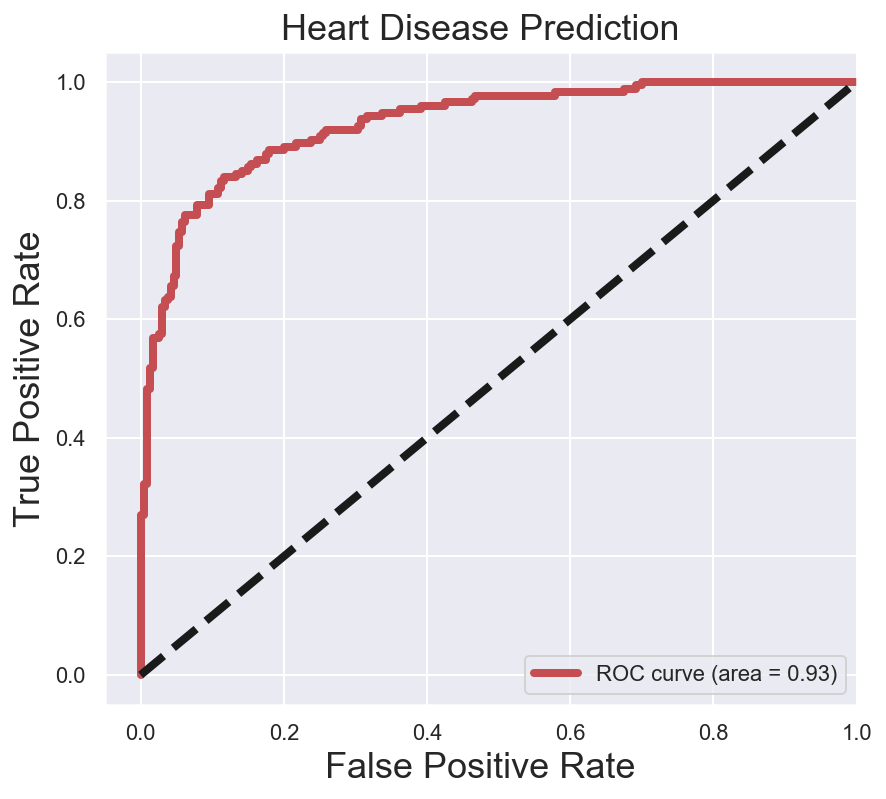

In [309]:
# ROC Curve Graph for Dropped Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train_dn, prob_MLP_dn.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [310]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

In [311]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

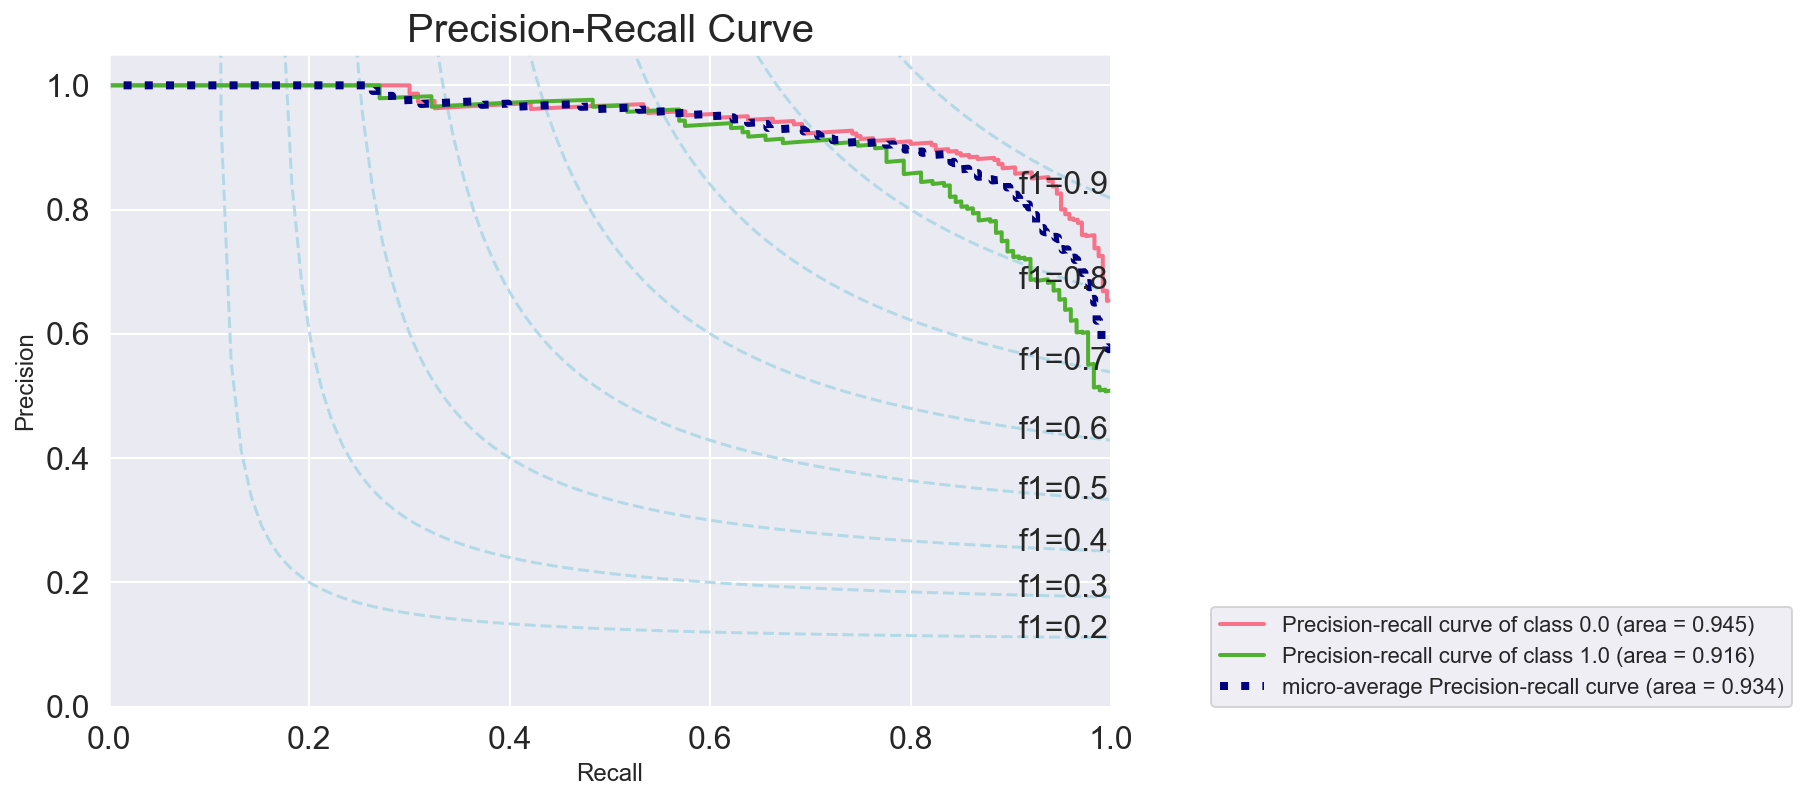

In [312]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train_dn,  prob_MLP_dn, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

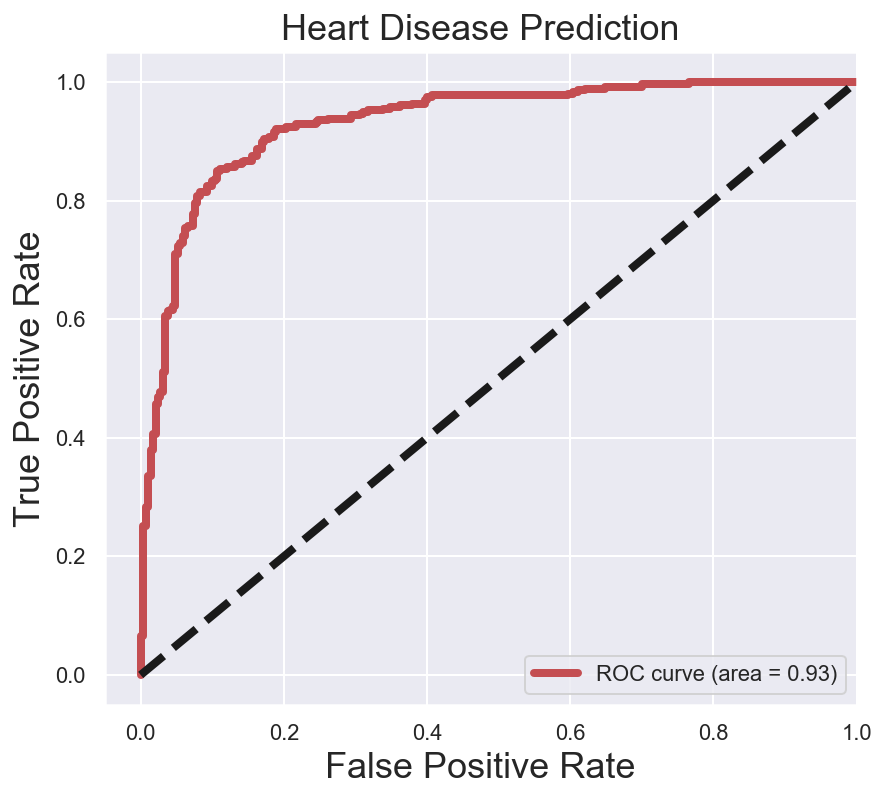

In [313]:
# ROC Curve Graph for Predicted Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train,  prob_MLP.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

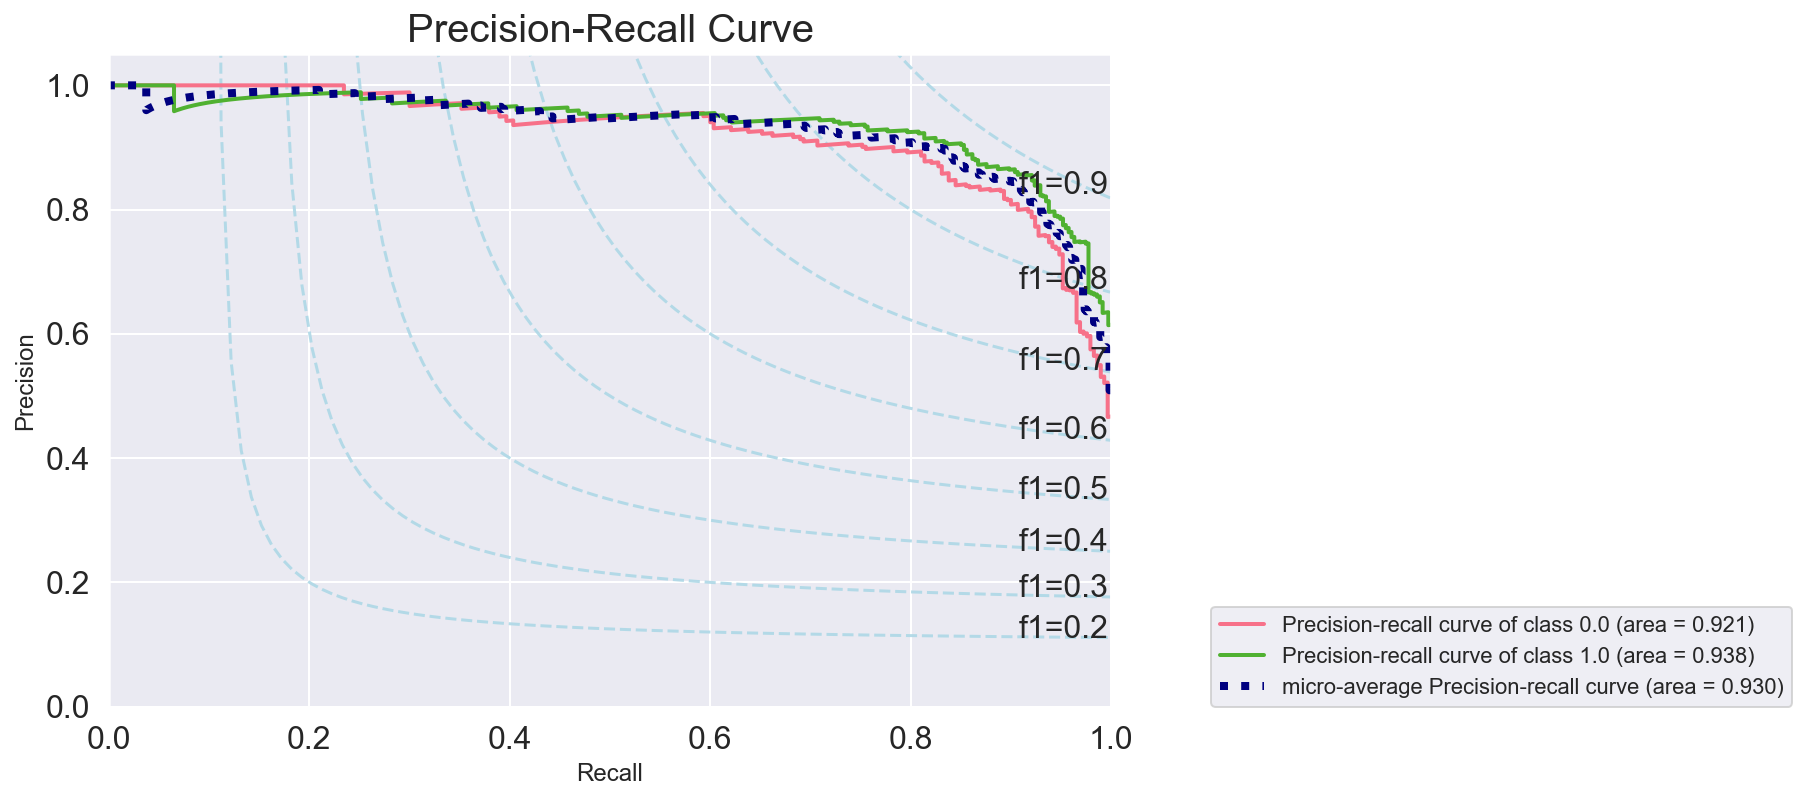

In [314]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train,  prob_MLP, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

# 6. Conclusion

All in all, by the analysis we can see that predicting the missing values will slightly increase the accuracy of predicting a heart disease. On the other hand, using different modelling for the dataset will help us see different methods and again increase the prediction accuracy of our analysis at the end. 

Our best model with predicting the missing values has **0.835** of prediction score, if we drop the missing values the score decreases to **0.823**. On the other hand, eliminating less related columns does not help, thus having all the columns is a better way to predict disease. The decrease in the scores are also caused by the number of subjects(patients). If we had more subjects the predictions would have been more accurate. 

Additionally, the recall and precision scores are very important for healthcare classification analysis. When we predicted the null values the recall & precision scores were higher, where recall score is 0.88 and precision score is 0.80. 

In conclusion, this project helps us to predict a heart disease on a subject with **83%** accuracy (by predicting the missing values), which can help doctors to diagnose a heart disease faster. This will increase the time efficiency on the diagnosis and continue with the further testing faster to cure the disease. 

** Additional Analysis That Could Have Been Done ** 

If I had time, I would have done the prediction models according to each missing value's age range & sex. By that the predictions would have been more accurate and increase the difference between dropped and predicted null values accuracy scores. 

If the dataset was larger, I could have tried different machine learning models and I would expect higher accuracy scores.

## Next Steps
    
- Try to collect more data and increase the number of subjects and have higher accurate predictions. 
- Improve missing value prediction by using another approach.
    - While I was doing the missing value predictions for each model the scores were not as high as I expected. My next step is to increase the scores of predicting missing values by using a different approach. I will split the data frame into age range, sex and pred_attribute to have more accurate predictions for missing values.
- Work on visualisation 